# **<u>Problem Statement</u>**

The dataset is from an ongoing cadiovascular study on residents of the town of Framingham, Masschusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients information. It includes over 4000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

# **<u>Data Description</u>**

1. **Sex:** male(0) or female(1);(Nominal)
2. **Age:** age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
education
3. **CurrentSmoker:** whether or not the patient is a current smoker (Nominal)
4. **CigsPerDay:** the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarretts, even half a cigarette.)
5. **BPMeds:** whether or not the patient was on blood pressure medication (Nominal)
6. **PrevalentStroke:** whether or not the patient had previously had a stroke (Nominal)
7. **prevalentHyp:** whether or not the patient was hypertensive (Nominal)
8. **diabetes:** whether or not the patient had diabetes (Nominal)
9. **totChol:** total cholesterol level (Continuous)
10. **sysBP:** systolic blood pressure (Continuous)
11. **diaBP:** diastolic blood pressure (Continuous)
12. **BMI:** Body Mass Index (Continuous)
13. **heartRate:** heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
14. **glucose:** glucose level (Continuous)
15. **10 year risk of coronary heart disease CHD** (binary: “1”, means “Yes”, “0” means “No”) - **Target Variable**

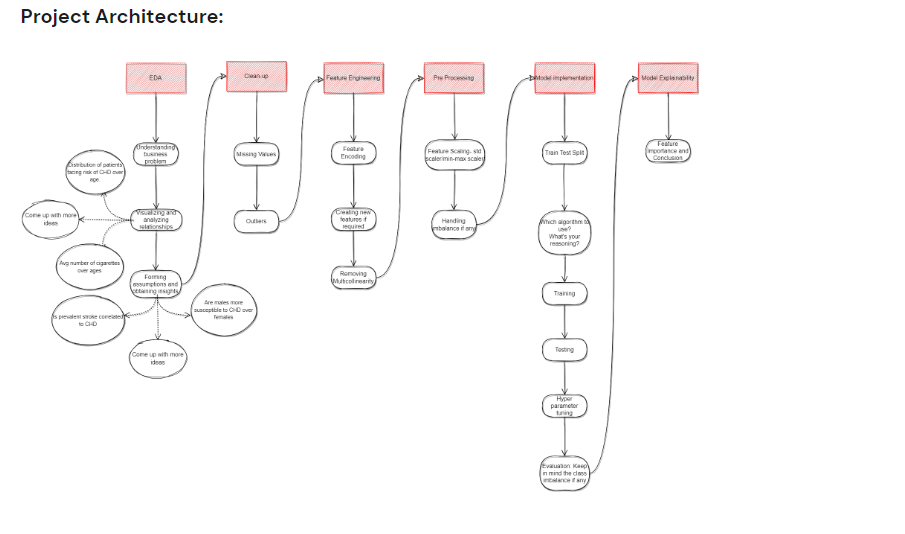

### <u>Importing Required Libraries</u>

In [ ]:
import pandas as pd # for handling tabular dataset
import matplotlib.pyplot as plt # for basic plotting 
import seaborn as sns # for advanced plotting
import numpy as np # for numeric calculation
import warnings 
warnings.filterwarnings('ignore') # handling warnings

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE # for handling data imbalanced problem.
from sklearn.model_selection import train_test_split # importing train_test_split from model_selection module of sklearn lib.

from sklearn.compose import ColumnTransformer # importing ColumnTransformer
from sklearn.preprocessing import StandardScaler # importing StandardScaler
from sklearn.preprocessing import RobustScaler # importing RobustScaler

## Applying Support Vector Machine
from sklearn.svm import SVC

# Importing Naive Bayes Classifier.
from sklearn.naive_bayes import GaussianNB

# Importing decision tree from tree module of sklearn library.
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree

# Importing the RandomFOrestClassifer from ensemble module of sklearn library.
from sklearn.ensemble import RandomForestClassifier


# Importing XGBoostClassifier from xgboost module.
from xgboost import XGBClassifier

import lazypredict
### importing LazyClassifier for classification problem
from lazypredict.Supervised import LazyClassifier
### importing LazyClassifier for classification problem because here we are solving Classification use case.
from lazypredict.Supervised import LazyClassifier
### importing breast Cancer Dataset from sklearn
from sklearn.datasets import load_breast_cancer


ModuleNotFoundError: ignored

In [ ]:
# mounting drive, so that we can fetch all the drive location directly here in google collab.

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **<center><u>1.Exploratory Data Analysis<u></center>**

In [ ]:
# loading dataset using read_csv method, assigning it to a df variable.

df = pd.read_csv("/content/drive/MyDrive/Almabetter/Cardiovascular Risk Prediction Project/data_cardiovascular_risk.csv")

In [ ]:
# Displying the top 5 records.

df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# Displying the last 5 records

df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [ ]:
# dropping Id columns

df =df.drop(columns = "id") # by using drop method of dataframe.

In [ ]:
# checking the shape of dataframe

df.shape

(3390, 16)

*There are 3390 records and 16 records.*

In [ ]:
# Showing the columns of dataframe

df.columns # using columns attribute of dataframe object

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Checking the missing values.

miss = df.isnull().sum().sort_values(ascending = False) # finding the missing values using isnull method of dataframe.
per =  df.isnull().mean().sort_values(ascending = False)# finding the mean of missing values.
pd.concat([miss,round(per*100)],keys = ['Missing_Values','Percentage'], axis = 1) # concatenating them using concat method of pandas

,Missing_Values,Percentage
glucose,304,9.0
education,87,3.0
BPMeds,44,1.0
totChol,38,1.0
cigsPerDay,22,1.0
BMI,14,0.0
heartRate,1,0.0
age,0,0.0
sex,0,0.0
is_smoking,0,0.0


* *As we can see that there are 9% of missing values in glucose feautre. And 3% missing values in education feature, and there are 1% missing values in BPMeds,totChol,cigsPerDay features. And very few missing values in BMI, and heart-rate.*


In [ ]:
# displying the basic information about the dataframe like no. of non-null and data type of respective column

df.info() # using info method of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


In [ ]:
# finding the basic stats of numeric columns

df.describe() # using describe method of dataframe.

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
# finding the count, unique,top and frequency of categorical features.

df.describe(include = "O") # include = "O" means for object kind of columns

,sex,is_smoking
count,3390,3390
unique,2,2
top,F,NO
freq,1923,1703


In [ ]:
# finding the numeric columns and assigning it to numeric_cols variable.

numeric_cols = df.describe().columns
print("Numeric columns are : ",list(numeric_cols))

Numeric columns are :  ['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']


In [ ]:
# finding the categorical columns and assigning it to cat_cols

cat_cols = df.describe(include = "O").columns
print("Categorical features are : ",list(cat_cols))

Categorical features are :  ['sex', 'is_smoking']


In [ ]:
# calculating the unique values of each numeric columns.

for col in numeric_cols:
  print(f"Unique values of {col} : {df[col].unique()}")
  print("\n")
  print("-----------------------------------------------")
  print("\n")

Unique values of age : [64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]


-----------------------------------------------


Unique values of education : [ 2.  4.  1.  3. nan]


-----------------------------------------------


Unique values of cigsPerDay : [ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]


-----------------------------------------------


Unique values of BPMeds : [ 0. nan  1.]


-----------------------------------------------


Unique values of prevalentStroke : [0 1]


-----------------------------------------------


Unique values of prevalentHyp : [0 1]


-----------------------------------------------


Unique values of diabetes : [0 1]


-----------------------------------------------


Unique values of totChol : [221. 212. 250. 233. 241. 272. 238. 295. 220. 326.  nan 210. 213. 227.
 188. 240. 257. 267. 232. 

In [ ]:
# Taking numeric discrete columns and assigning it to numeric_discrete_cols variable

numeric_discrete_cols = ['education', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

In [ ]:
# Taking numeric continuous columns and assigning it to numeric_cont_cols

numeric_cont_cols = ['age','cigsPerDay','totChol', 'sysBP', 'diaBP','BMI','heartRate','glucose']

In [ ]:
print("Numeric Discrete columns : ",numeric_discrete_cols)

Numeric Discrete columns :  ['education', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']


In [ ]:
print("Numeric Continuous columns : ",numeric_cont_cols)

Numeric Continuous columns :  ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


## **<u>1.1 Visualize and Analyze Relationships</u>**

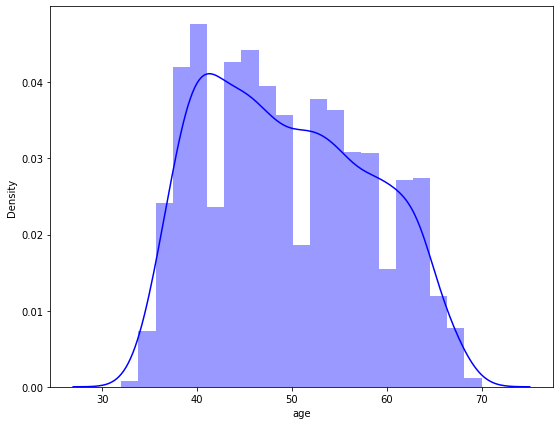

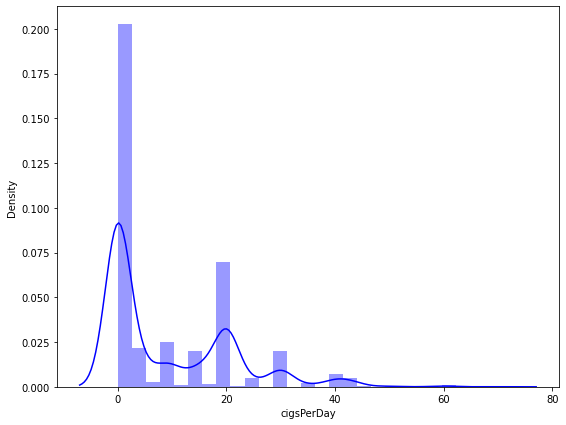

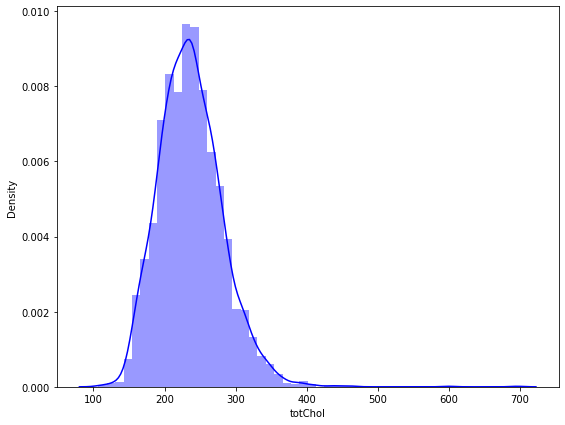

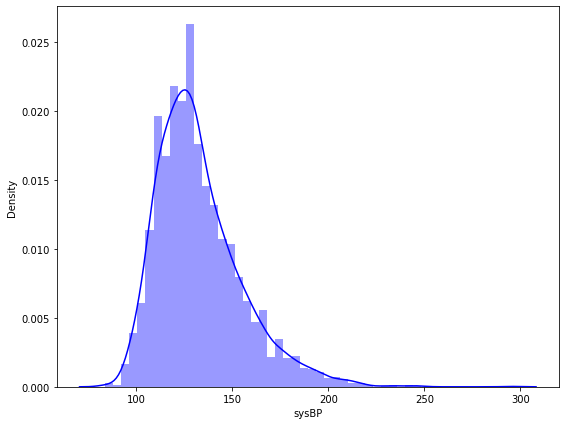

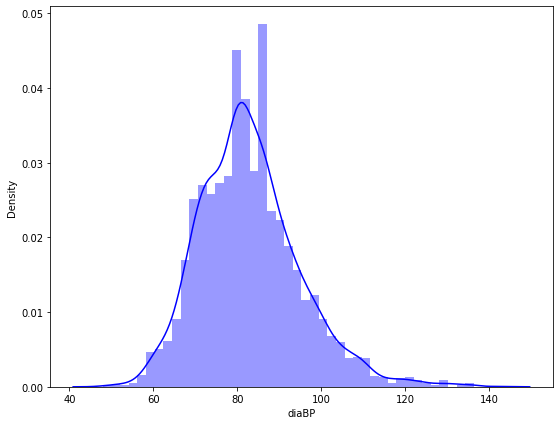

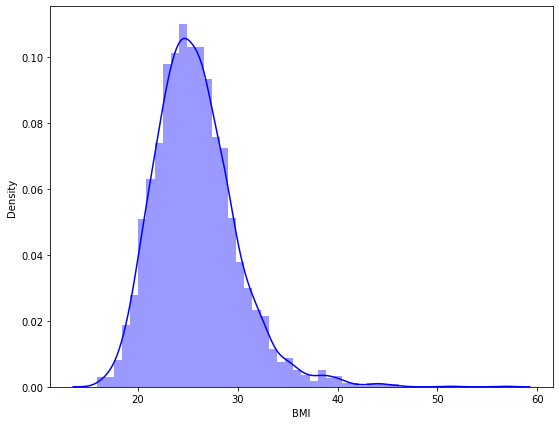

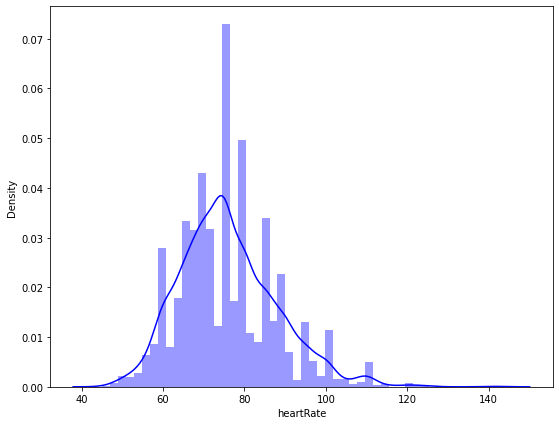

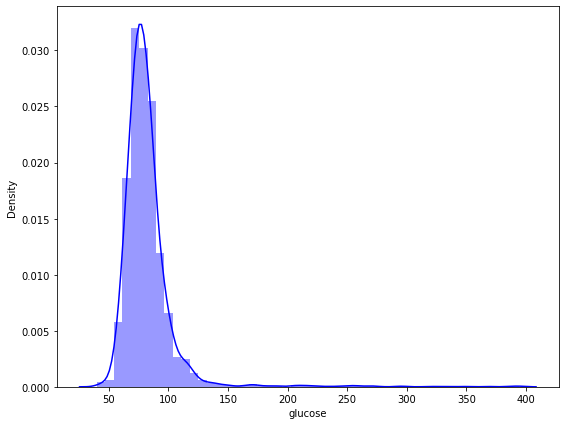

In [ ]:
# Showing the distribution of all numeric continuous columns using distplot of seaborn

for col in numeric_cont_cols:
  plt.figure(figsize = (9,7))
  ax = plt.gca() # for getting the correct axis.
  sns.distplot(df[col],ax = ax,color = "blue") # 
  plt.show() # to show all the graphs.

* *Cigaretteperday, BPMeds,prevalentStroke, Diabetes, totChol, and glucose have right skewed distribution.*

* *SysBP, DiaBP, BMI, and heartRate have lightly right skewed distribution.*

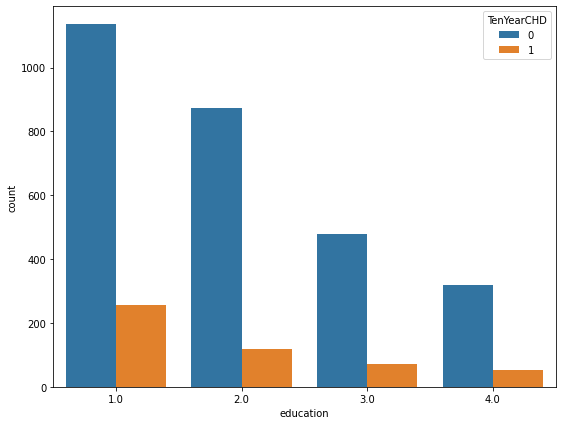

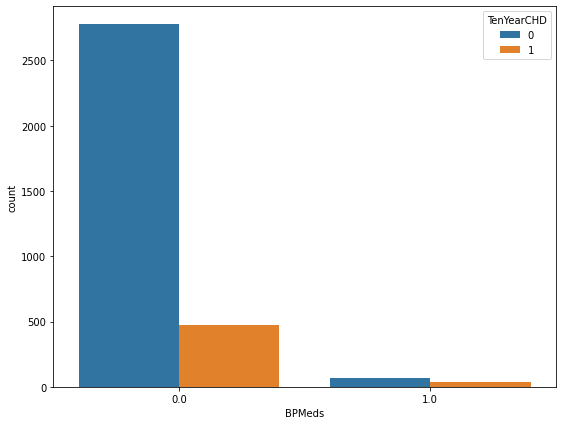

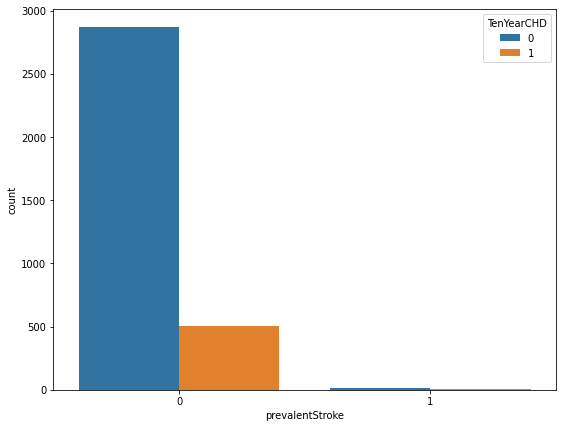

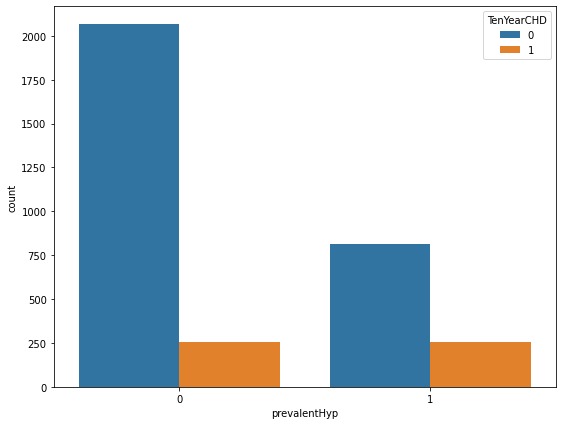

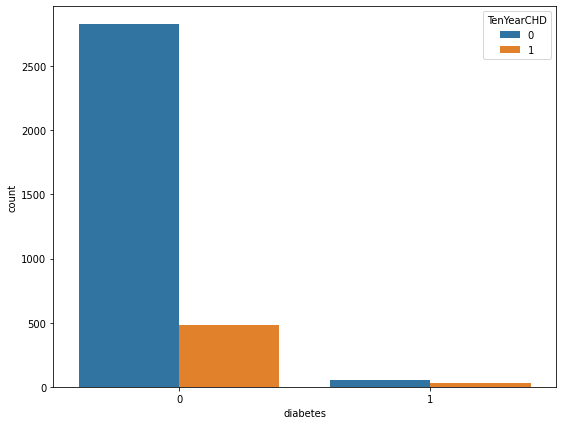

In [ ]:
# Showing the count of all the categories using countplot of seaborn.

for col in numeric_discrete_cols:
  plt.figure(figsize = (9,7))
  ax = plt.gca() # for getting the correct axis.
  sns.countplot(x = col,hue = "TenYearCHD", ax = ax,data = df) # using hue = "TenYearCHD"
  plt.show() # for showing the all graphs.

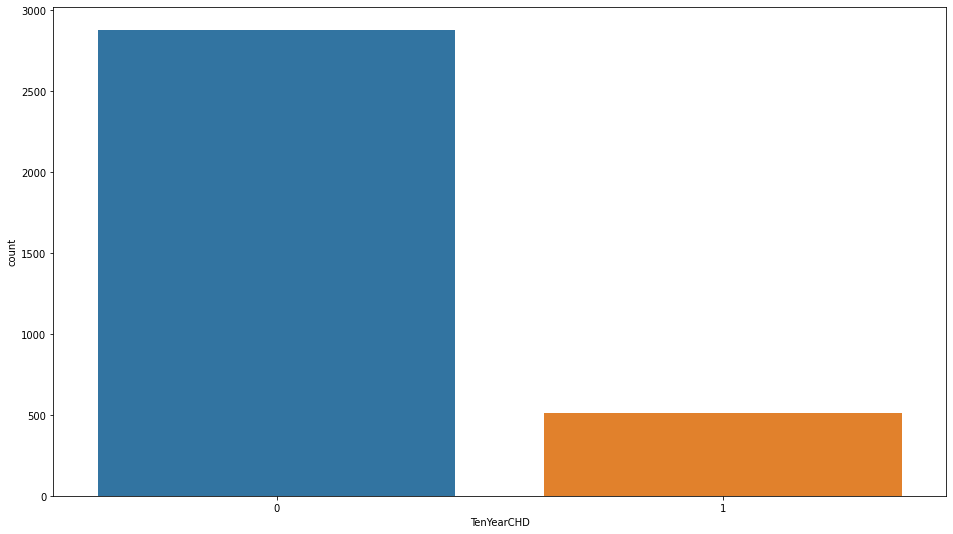

In [ ]:
# Countplot of target column

plt.figure(figsize = (16,9))
sns.countplot(x  = 'TenYearCHD', data = df); # Using countplot of seaborn

* <i>As we can that in above graph data is imbalanced, which we need to handle 
later on. </i>

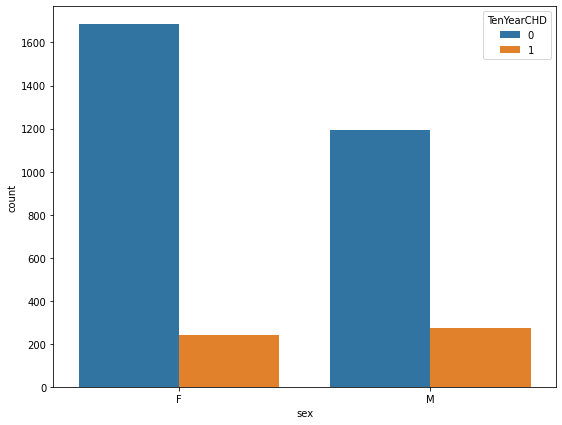

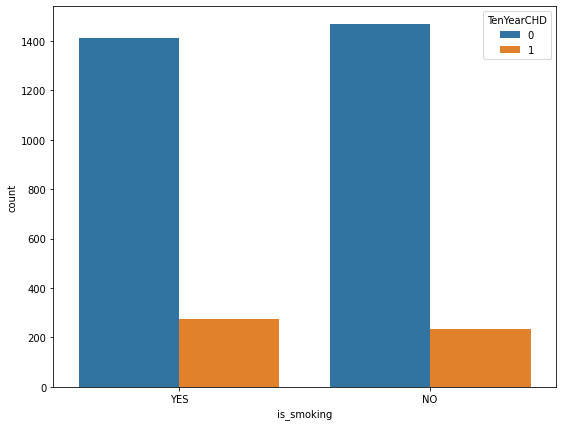

In [ ]:
# ploting countplot of cat_cols

for col in cat_cols:
  plt.figure(figsize = (9,7))
  ax = plt.gca() # getting current axis.
  sns.countplot(x = col, ax = ax, hue = "TenYearCHD", data = df) # hue = "TenyearCHD"
  plt.show() # to show all graphs.

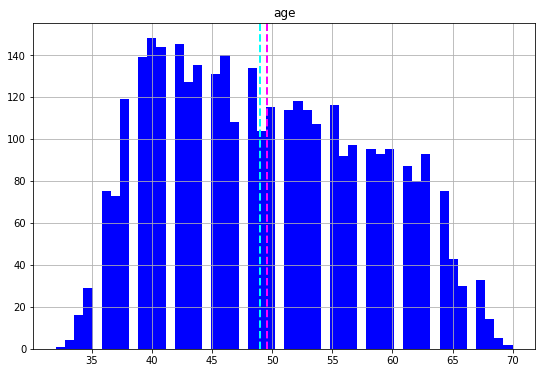

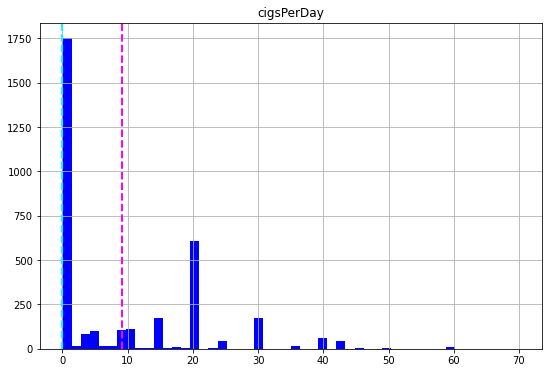

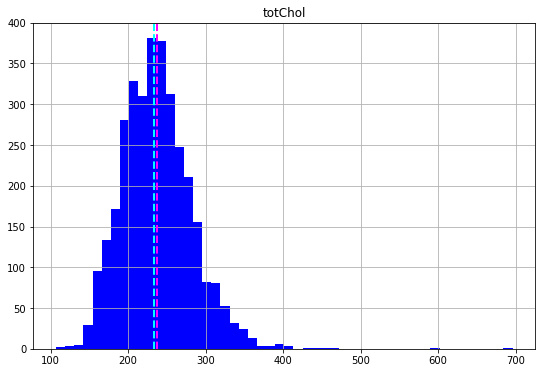

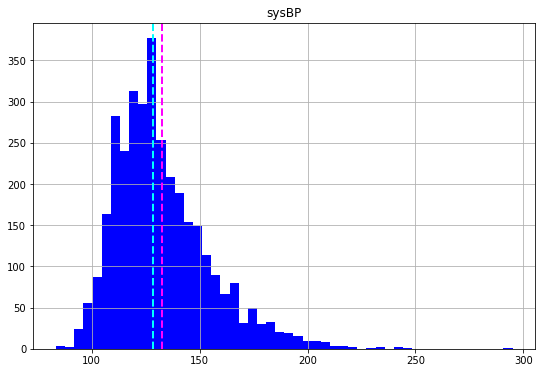

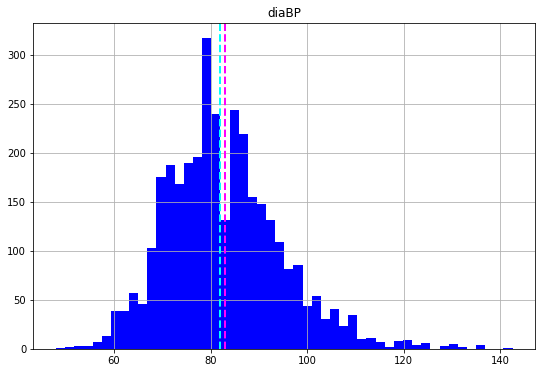

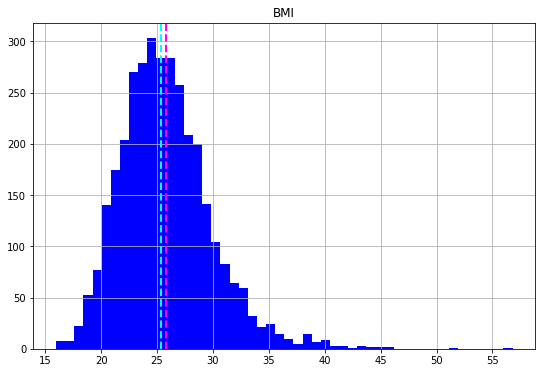

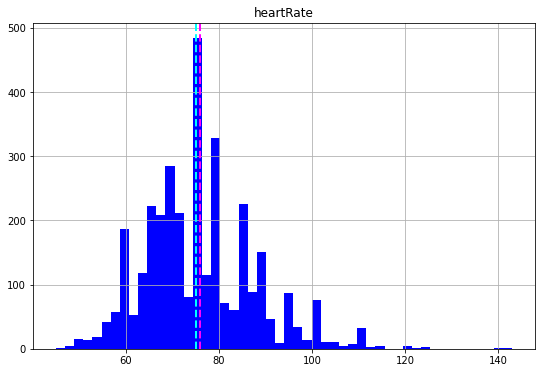

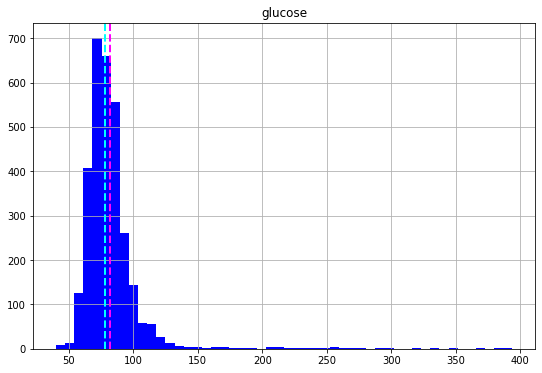

In [ ]:
# Histogram of all the numeric continuous columns.

for col in numeric_cont_cols:
    fig = plt.figure(figsize=(9, 6)) # setting the figure size
    ax = fig.gca() # it gives gca the current location.
    feature = df[col] 
    feature.hist(bins=50, ax = ax,color = "blue")
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2) # for mean
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)  # for median
    ax.set_title(col) # setting the title.
plt.show() # to show all graphs

In [ ]:
pip install autoviz # installing autoviz module.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 3.6 MB/s 
     |████████████████████████████████| 3.2 MB 32.5 MB/s 
     |████████████████████████████████| 9.4 MB 68.4 MB/s 
     |████████████████████████████████| 1.7 MB 40.3 MB/s 
     |████████████████████████████████| 240 kB 59.8 MB/s 
     |████████████████████████████████| 16.4 MB 45.4 MB/s 
     |████████████████████████████████| 12.9 MB 48.4 MB/s 
     |████████████████████████████████| 55 kB 4.8 MB/s 
     |████████████████████████████████| 295 kB 60.4 MB/s 
     |████████████████████████████████| 965 kB 62.6 MB/s 
     |████████████████████████████████| 18.5 MB 586 kB/s 
     |████████████████████████████████| 1.6 MB 32.0 MB/s 
     |████████████████████████████████| 121 kB 74.0 MB/s 
     |████████████████████████████████| 83 kB 2.7 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=dd6f3925f

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class#Instantiate the AutoViz class
AV = AutoViz_Class() # Creating Object of Autoviz class.

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Here we are applying AutoViz on fresh whole dataset.

AV.AutoViz('/content/drive/MyDrive/Almabetter/Cardiovascular Risk Prediction Project/data_cardiovascular_risk.csv')

Output hidden; open in https://colab.research.google.com to view.

# **<center><u>2.Clean-Up</u></center>**

##**<u>2.1 Missing Values**</u>

In [ ]:
# showing the top 10 records using head method of dataframe object

df.head(10)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
8,41,2.0,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0


In [ ]:
# Finding the Missing, and Average with their respective columns.

miss = df.isnull().sum().sort_values(ascending = False) # finding the missing values
per = df.isnull().mean().sort_values(ascending = False) # finding the average
pd.concat([miss,round(per,3)*100],keys = ['Missing_Values','Percentage'],axis =1) # concatenating by using concat method of pandas

,Missing_Values,Percentage
glucose,304,9.0
education,87,2.6
BPMeds,44,1.3
totChol,38,1.1
cigsPerDay,22,0.6
BMI,14,0.4
heartRate,1,0.0
age,0,0.0
sex,0,0.0
is_smoking,0,0.0


* *We have some missing values in some columns, which we will impute using KNNImputer after <u>feature construction</u> section*



#**<u>2.2 Outliers Detection</u>**

In [ ]:
numeric_cont_cols

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

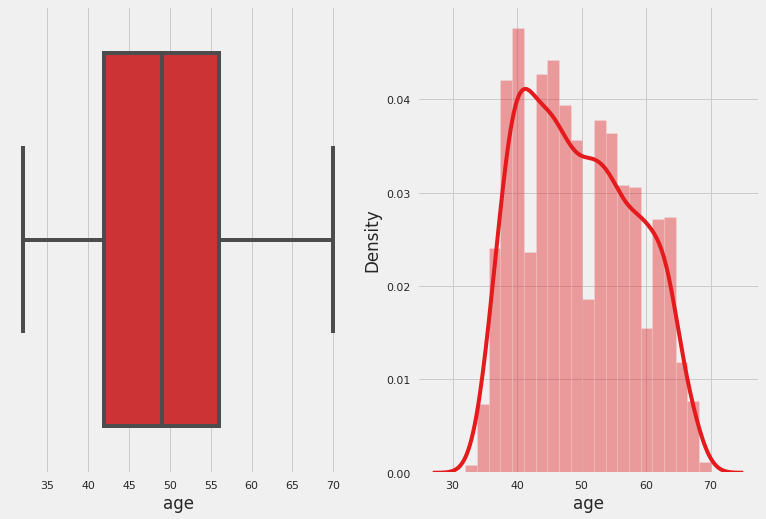

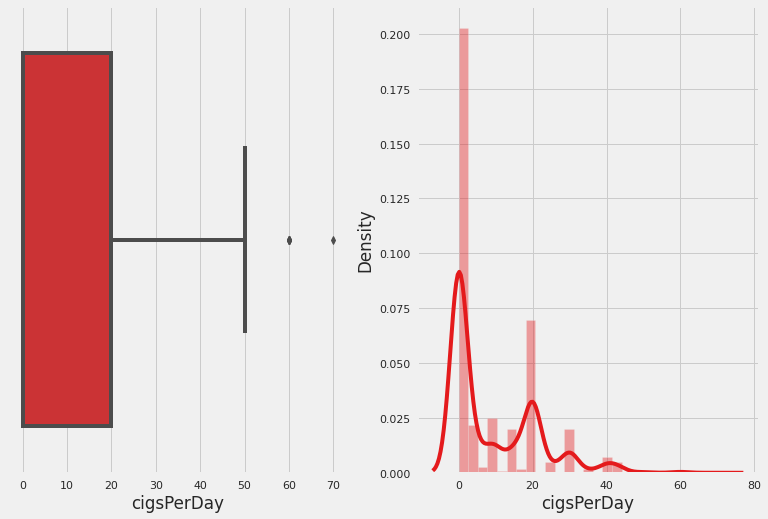

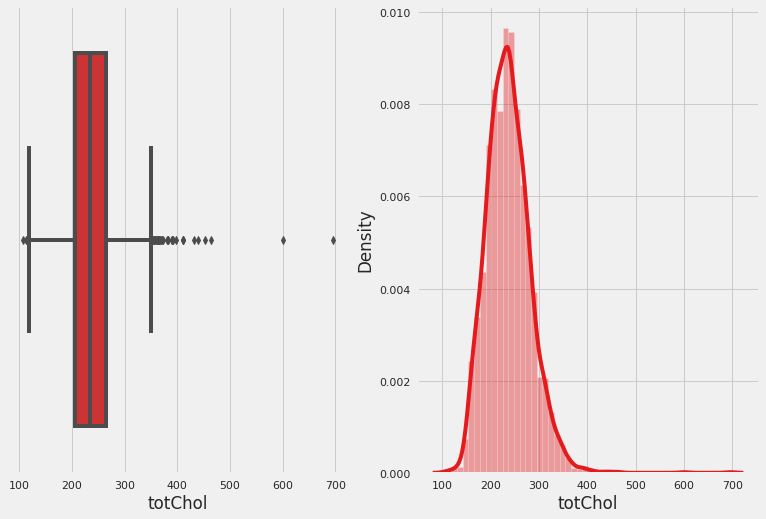

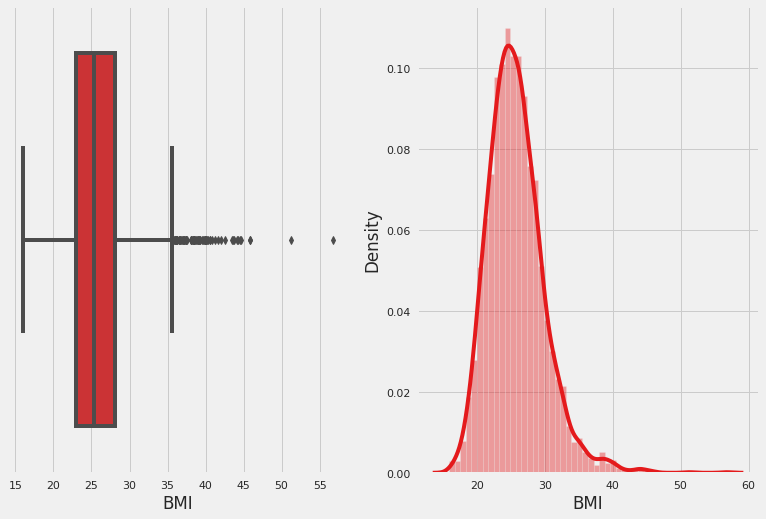

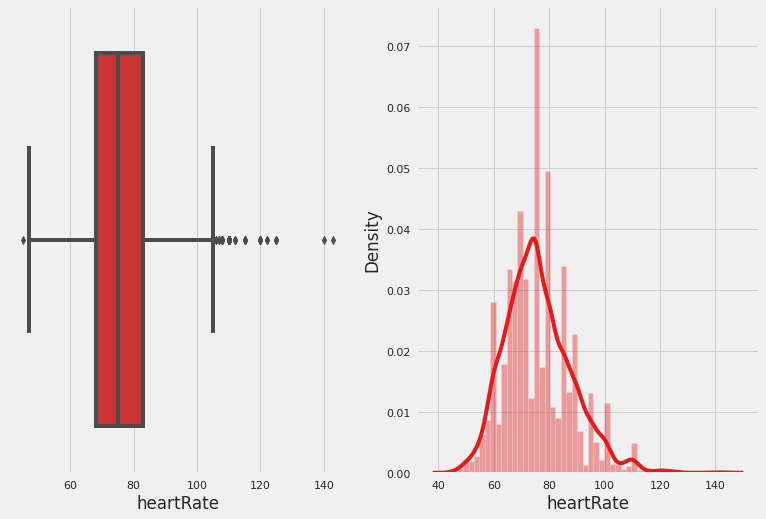

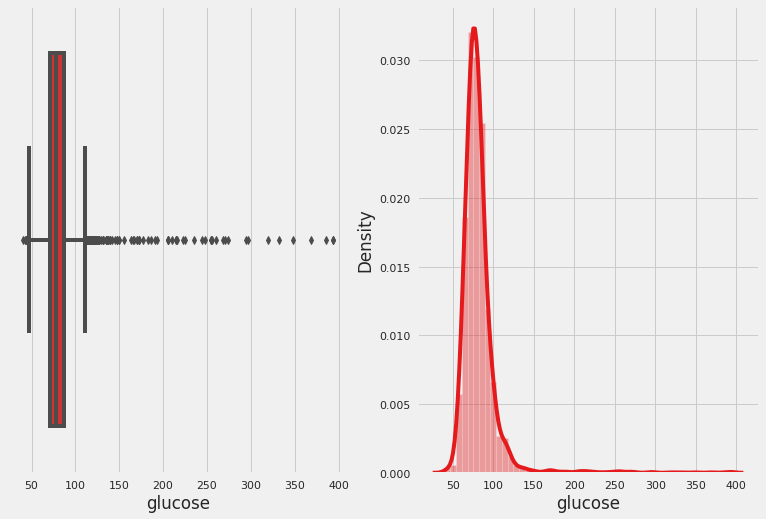

In [ ]:
# We are trying to show the outliers in numeric continuous columns using boxplot.

for col in ['age','cigsPerDay','totChol','BMI','heartRate','glucose']:
  plt.figure(figsize = (12,8))
  # ax = plt.gca() # for getting current axis
  plt.subplot(1,2,1)
  sns.boxplot(df[col])
  plt.subplot(1,2,2)
  sns.distplot(df[col])
  plt.show() # to show all graphs

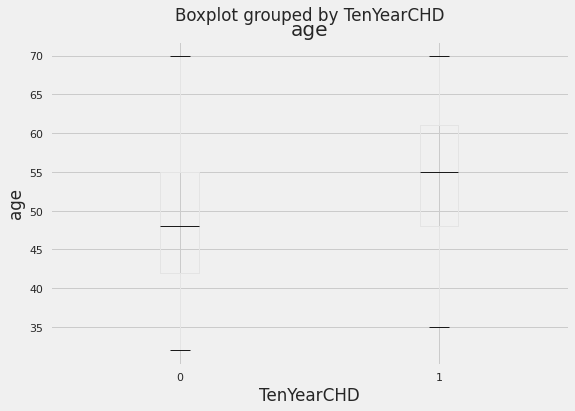

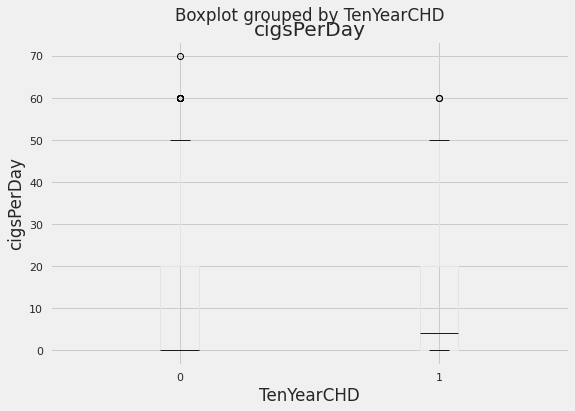

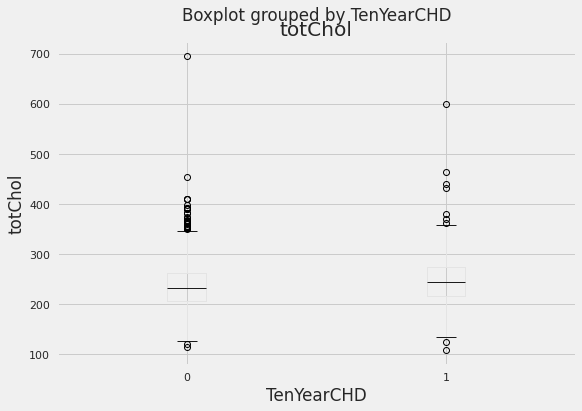

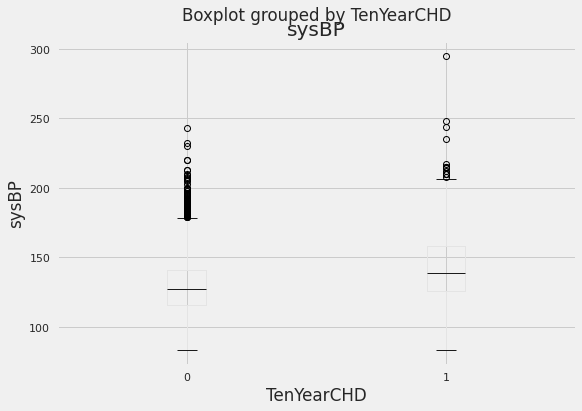

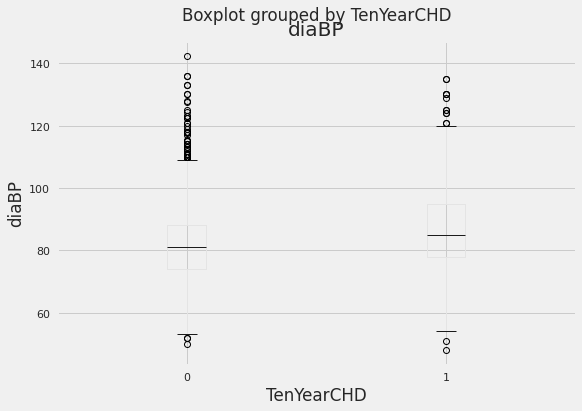

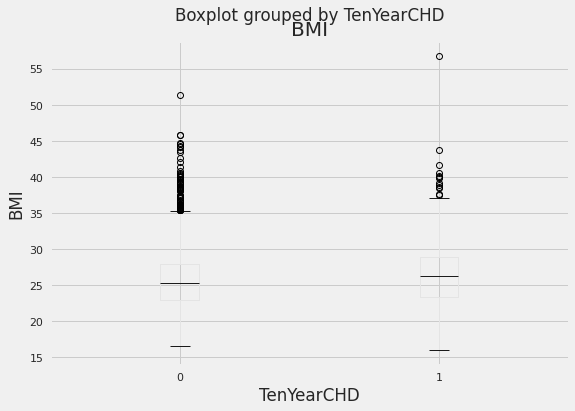

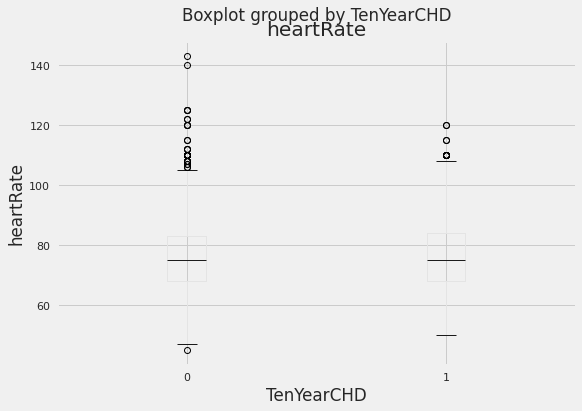

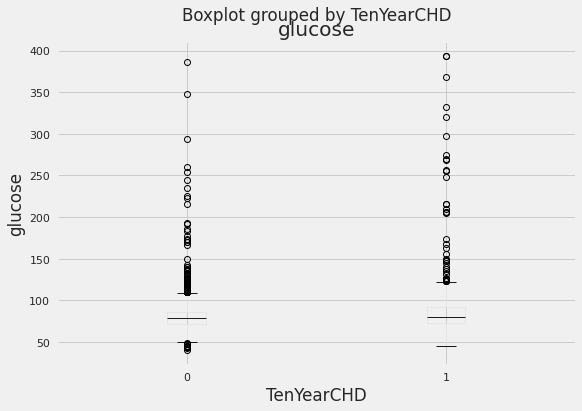

In [ ]:
for col in numeric_cont_cols:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  df.boxplot(column = col, by = 'TenYearCHD', ax = ax)
  ax.set_ylabel(col)
  plt.show()

In [ ]:
# # applying boxplot
# # finding the catgorical features.

# for col in cat_cols:
#   plt.figure(figsize = (9,7))
#   ax = plt.gca()
#   sns.boxplot(df[col],ax = ax)
#   plt.show()

# **<center><u>3.Feature Engineering</u></center>**

# **<u>3.1 Feature Encoding**</u>

In [ ]:
cat_cols

Index(['sex', 'is_smoking'], dtype='object')

In [ ]:
df['sex'].value_counts() # this is nominal so we can apply one hot encoding

F    1923
M    1467
Name: sex, dtype: int64

In [ ]:
df['is_smoking'].value_counts() # this is nominal so we can apply one hot encoding

NO     1703
YES    1687
Name: is_smoking, dtype: int64

In [ ]:
df = pd.get_dummies(columns = ['sex','is_smoking'],drop_first = True, data = df)

In [ ]:
df.head()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_M,is_smoking_YES
0,64,2.0,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1,0,1
1,36,4.0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,1,0
2,46,1.0,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,0,1
3,50,1.0,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,1,1
4,64,1.0,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,0,1


In [ ]:
df.shape

(3390, 16)

# **<u>Feature Construction & Removing Multicollinearity**</u>

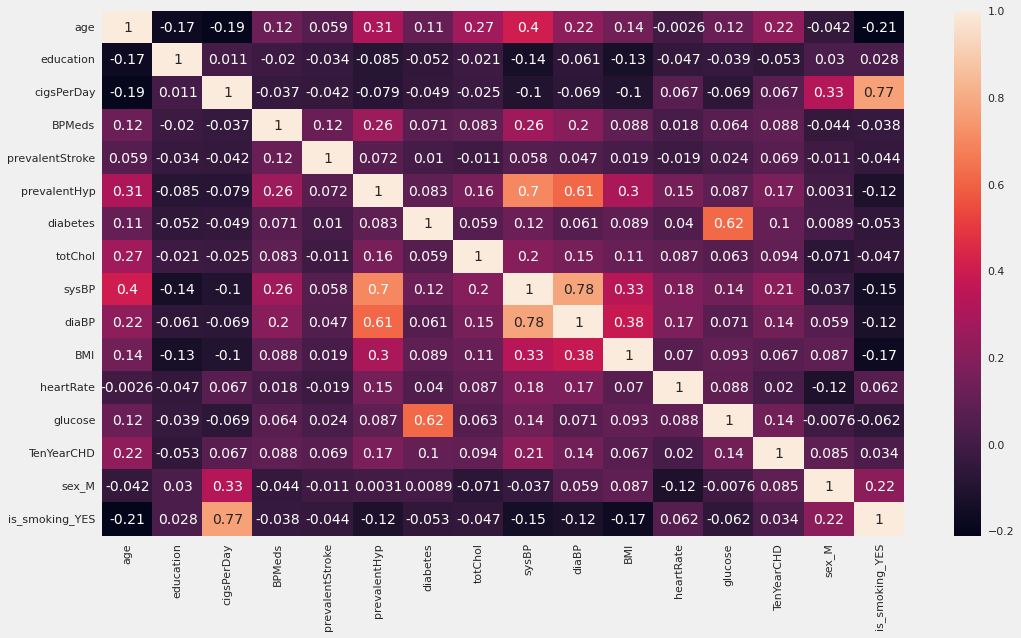

In [ ]:
plt.figure(figsize = (16,9))
sns.heatmap(df.corr(),annot = True)

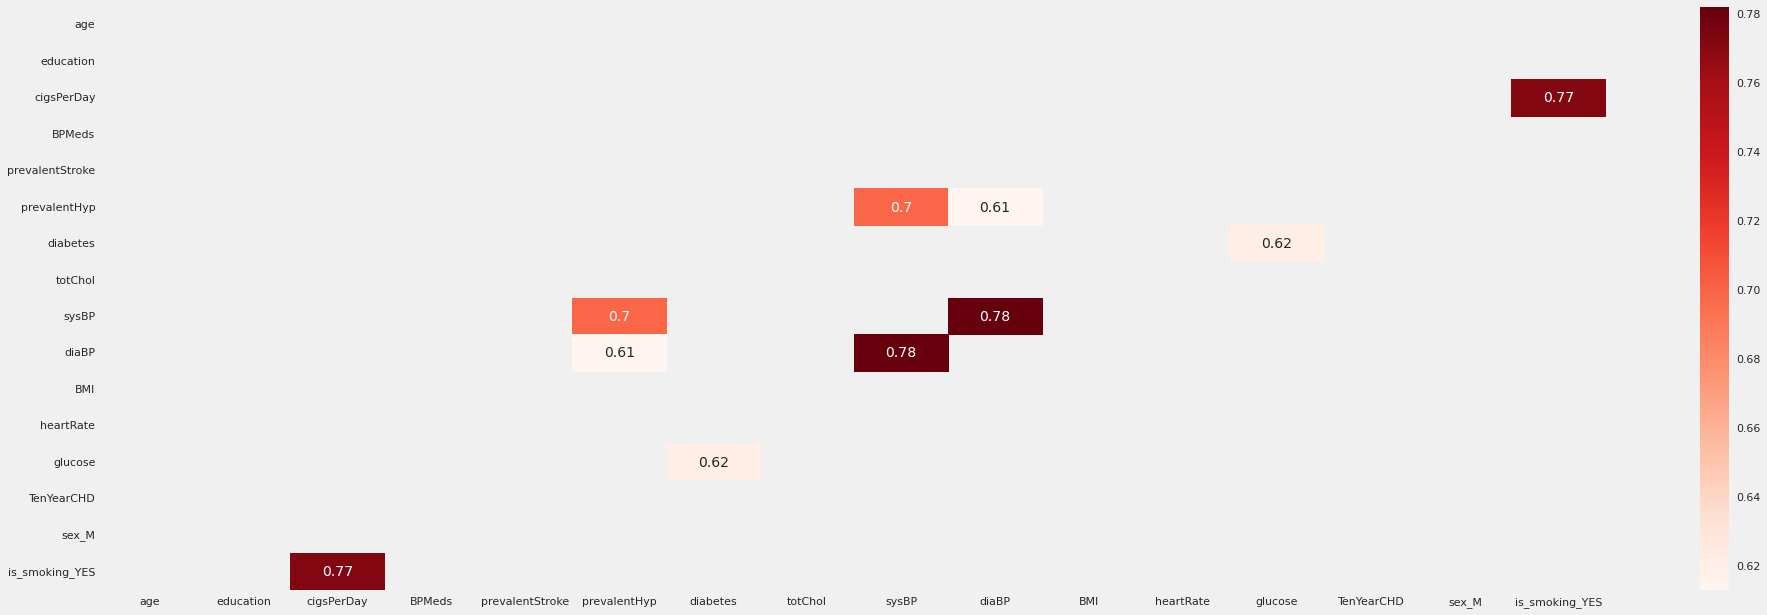

In [ ]:
dfCorr = df.corr()
filteredDf = dfCorr[((dfCorr >= .50) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [ ]:
df['is_smoking_YES'].value_counts()

0    1703
1    1687
Name: is_smoking_YES, dtype: int64

In [ ]:
df['cigsPerDay'].value_counts()

0.0     1703
20.0     606
30.0     176
15.0     172
10.0     106
9.0      104
5.0      103
3.0       79
40.0      62
1.0       48
25.0      44
43.0      42
35.0      17
2.0       17
6.0       14
8.0       10
7.0        8
60.0       8
18.0       7
4.0        7
50.0       6
17.0       5
23.0       5
11.0       4
12.0       3
13.0       3
19.0       2
16.0       2
45.0       2
14.0       1
70.0       1
38.0       1
Name: cigsPerDay, dtype: int64

* *We can see from cigsPerDay value counts that there are 1703 people who have consumed 0 cigarette per day. The same insight, we can extract from is_smoking_YES column. So we can easily drop is_smoking_YES column since both of them are giving same information.*

In [ ]:
df = df.drop(columns = "is_smoking_YES")

In [ ]:
df.head()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_M
0,64,2.0,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1,0
1,36,4.0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,1
2,46,1.0,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,0
3,50,1.0,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,1
4,64,1.0,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,0


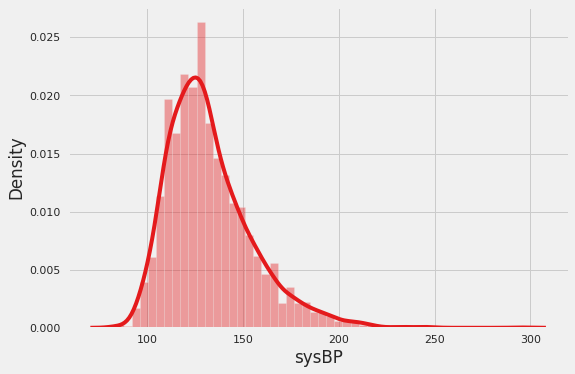

In [ ]:
sns.distplot(df['sysBP'])

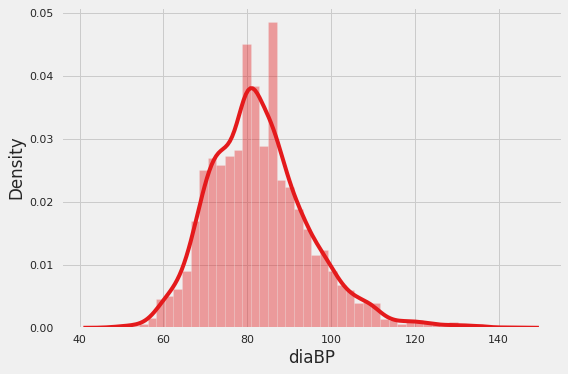

In [ ]:
sns.distplot(df['diaBP'])

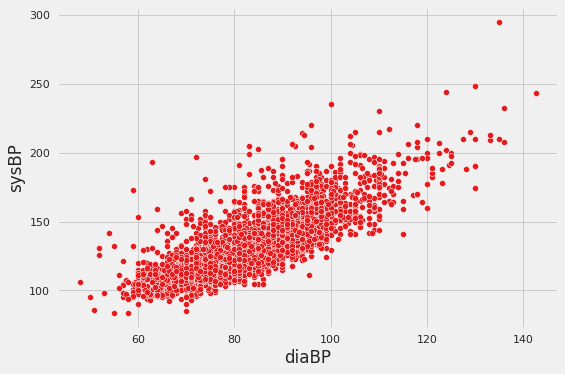

In [ ]:
sns.scatterplot(x = "diaBP", y = "sysBP", data = df);

In [ ]:
# Here, we are taking average of sysBP and diaBP and making a new feature which is AvgBP.

df['AvgBP'] = (df['sysBP'] + df['diaBP'])/2

* *As we can see that from distribution plot and scatterplot that systolic blood pressure and diastolic blood pressure are highly correlated. The same we confirmed from heatmap and found the pearson correlation between these two variables to be 78%. So we decided to combine these two variables and formed new variable AvgBP.*

In [ ]:
# Displaying the top 5 records of dataframe.

df.head() # using head method of df object.

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_M,AvgBP
0,64,2.0,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1,0,116.50
1,36,4.0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,1,133.00
2,46,1.0,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,0,93.50
3,50,1.0,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,1,123.00
4,64,1.0,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,0,110.75


In [ ]:
# dropping sysBP, and diaBP because of high multicollinearity using drop method of df

df = df.drop(columns = ['sysBP','diaBP'])

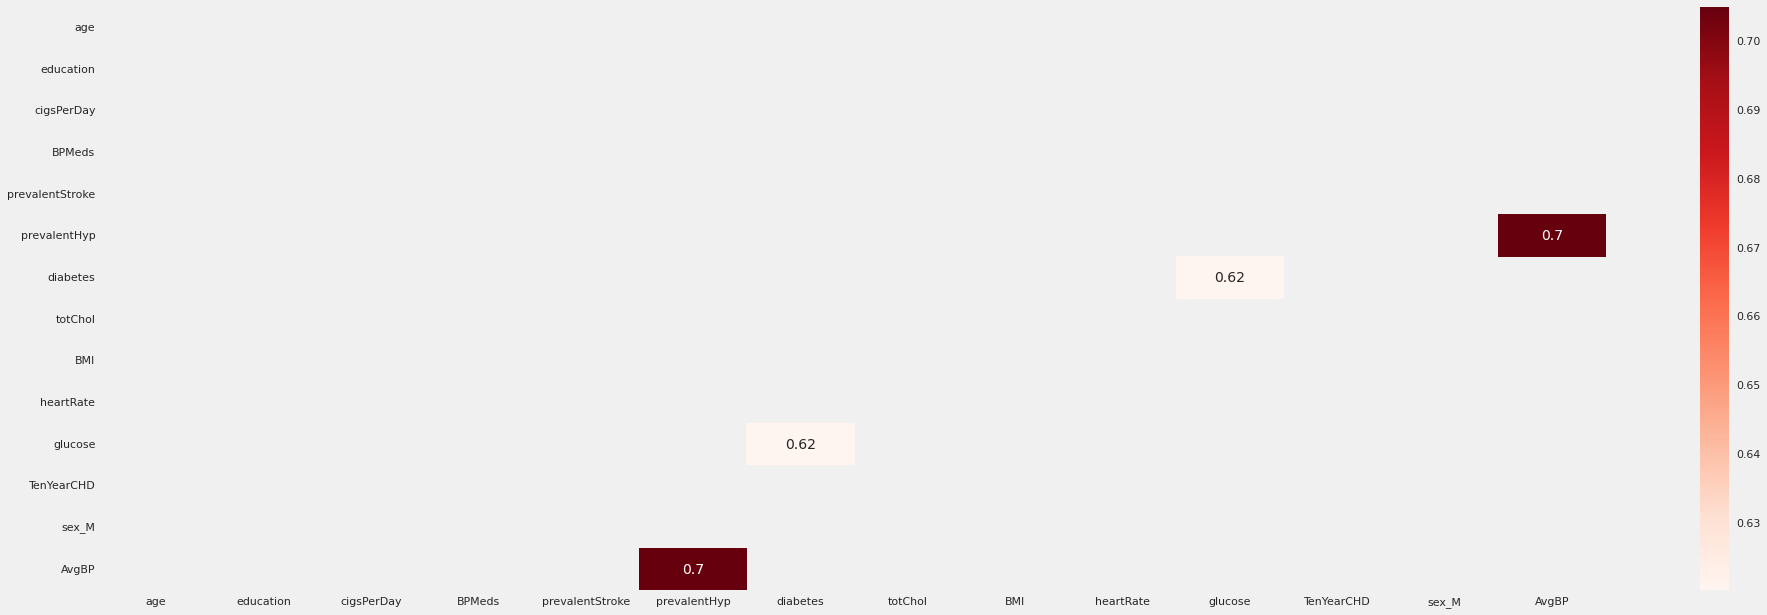

In [ ]:
# Visualization of correlation of more than or equal to 0.5 in both the direction using heatmap of seaborn.

dfCorr = df.corr()
filteredDf = dfCorr[((dfCorr >= .50) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show() # to show it.

## **<u>Imputing Missing Values**</u>

* *Using Multi-variate imputation i.e. KNNImputer.*

In [ ]:
# Splitting Dataframe into X(independent columns) and y(dependent/Target).

X = df.drop(columns = "TenYearCHD") # dropping Target using drop method of df.
y = df['TenYearCHD'] # taking target feature in y.

In [ ]:
# Displaying top 5 records of X.

X.head()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,sex_M,AvgBP
0,64,2.0,3.0,0.0,0,0,0,221.0,NaN,90.0,80.0,0,116.50
1,36,4.0,0.0,0.0,0,1,0,212.0,29.77,72.0,75.0,1,133.00
2,46,1.0,10.0,0.0,0,0,0,250.0,20.35,88.0,94.0,0,93.50
3,50,1.0,20.0,0.0,0,1,0,233.0,28.26,68.0,94.0,1,123.00
4,64,1.0,30.0,0.0,0,0,0,241.0,26.42,70.0,77.0,0,110.75


##**<i><u>KNNImputer</u></i>**

*KNNimputer is a scikit-learn class used to fill out or predict the missing values in a dataset. It is a more useful method which works on the basic approach of the KNN algorithm rather than the naive approach of filling all the values with mean or the median. In this approach, we specify a distance from the missing values which is also known as the K parameter. The missing value will be predicted in reference to the mean of the neighbours.*

In [ ]:
# We are creating an object of KNNImputer by passing n_neighbors = 5.

imputer = KNNImputer(n_neighbors = 5)
data = imputer.fit_transform(X) # fitting imputer on independent dataframe.

In [ ]:
# Showing the data frame imputation.

print("Data after doing imputation : \n\n",data)

Data after doing imputation : 

 [[ 64.    2.    3.  ...  80.    0.  116.5]
 [ 36.    4.    0.  ...  75.    1.  133. ]
 [ 46.    1.   10.  ...  94.    0.   93.5]
 ...
 [ 44.    3.    3.  ...  72.    1.  141.5]
 [ 60.    1.    0.  ...  85.    1.  136. ]
 [ 54.    3.    0.  ...  92.    0.  100.5]]


In [ ]:
# Making a dataframe of data array using DataFrame object of pandas. Ans assigning it to X again.
X = pd.DataFrame(data, columns = X.columns)

In [ ]:
# Showing head of X.

X.head()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,sex_M,AvgBP
0,64.0,2.0,3.0,0.0,0.0,0.0,0.0,221.0,26.912,90.0,80.0,0.0,116.50
1,36.0,4.0,0.0,0.0,0.0,1.0,0.0,212.0,29.770,72.0,75.0,1.0,133.00
2,46.0,1.0,10.0,0.0,0.0,0.0,0.0,250.0,20.350,88.0,94.0,0.0,93.50
3,50.0,1.0,20.0,0.0,0.0,1.0,0.0,233.0,28.260,68.0,94.0,1.0,123.00
4,64.0,1.0,30.0,0.0,0.0,0.0,0.0,241.0,26.420,70.0,77.0,0.0,110.75


In [ ]:
# Checking the missing values of X dataframe.

miss = X.isnull().sum().sort_values(ascending = False)
per = X.isnull().mean().sort_values(ascending = False)
pd.concat([miss,per,X.dtypes],keys = ['Missing_Values','Percentage','Dtype'], axis =1)

,Missing_Values,Percentage,Dtype
age,0,0.0,float64
education,0,0.0,float64
cigsPerDay,0,0.0,float64
BPMeds,0,0.0,float64
prevalentStroke,0,0.0,float64
prevalentHyp,0,0.0,float64
diabetes,0,0.0,float64
totChol,0,0.0,float64
BMI,0,0.0,float64
heartRate,0,0.0,float64


* *As we can see that, there is no missing value in X dataframe.*

# **<center><u>4.Pre-Processing**</u></center>

## **<u>4.1 Feature Scaling**</u>

In [ ]:
# displaying the all numeric continuous columns.

print("Numeric Continuous columns are : \n",numeric_cont_cols)

Numeric Continuous columns are : 
 ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


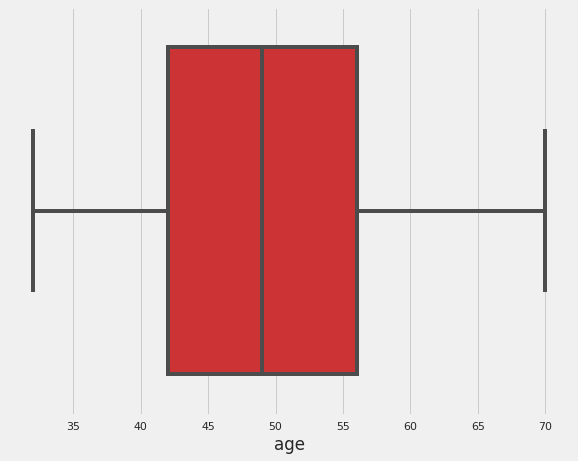

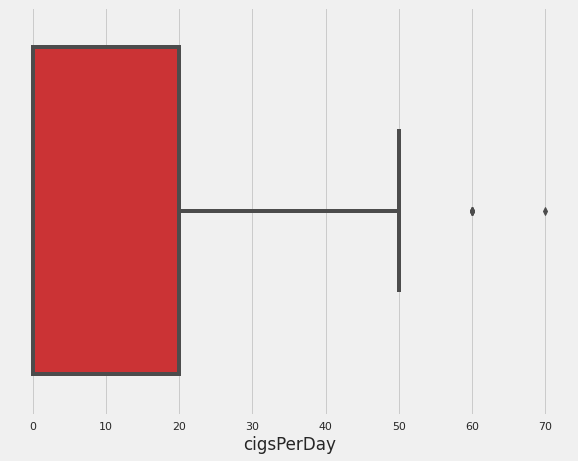

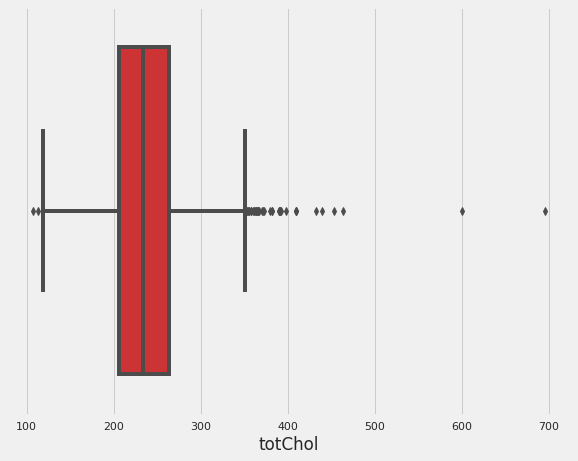

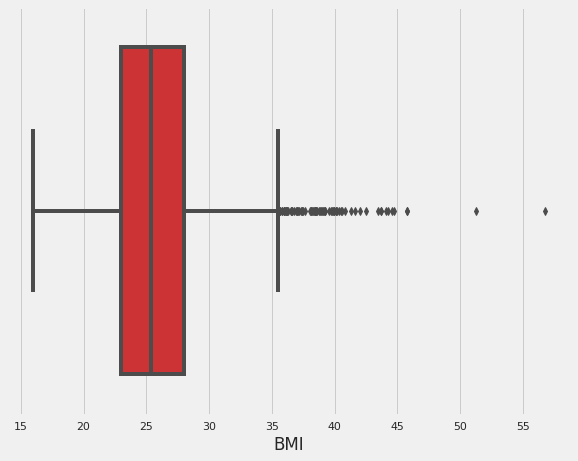

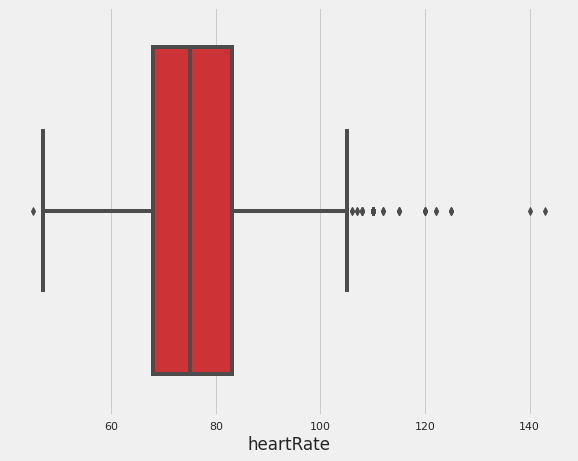

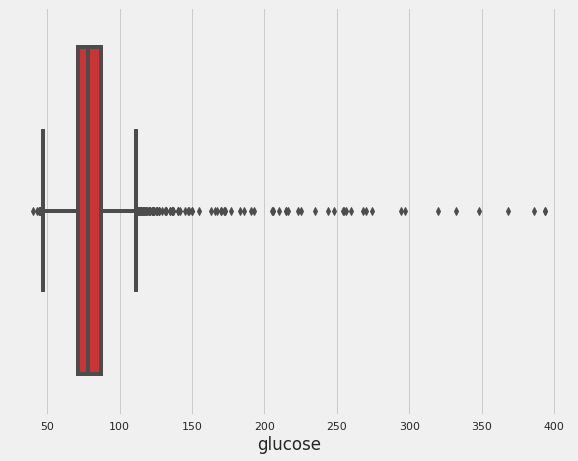

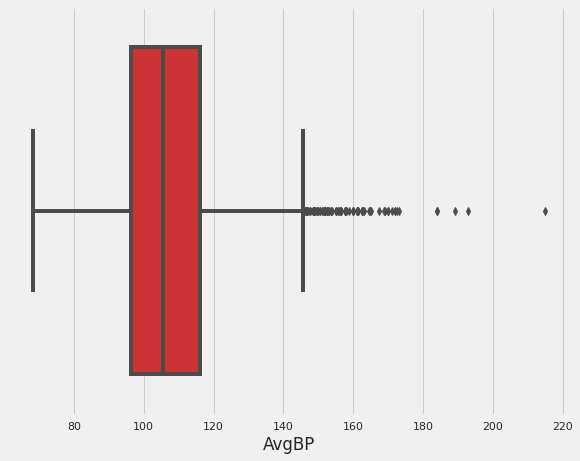

In [ ]:
# Visualization of all numeric continuous columns using boxplot.

for col in ['age', 'cigsPerDay', 'totChol','BMI', 'heartRate', 'glucose','AvgBP']:
  plt.figure(figsize = (9,7))
  ax = plt.gca() # to get current axis
  sns.boxplot(df[col], ax =ax)
  plt.show() # to display all the column's graph

* *As we can see from the above box plots, we have good number of outliers in 'totChol','BMI', 'heartRate', 'glucose', and 'AvgBP'. We will handle it later on.*

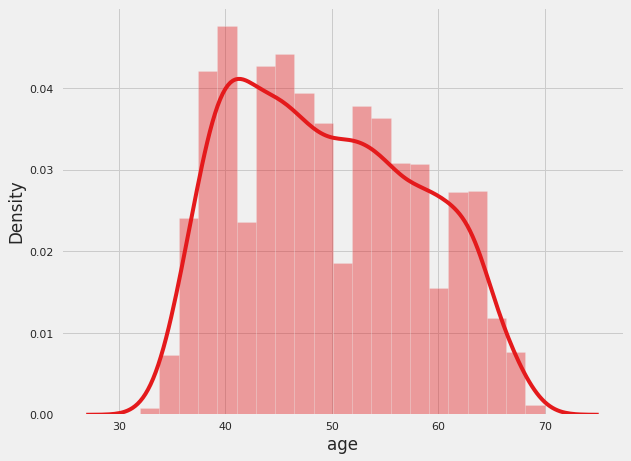

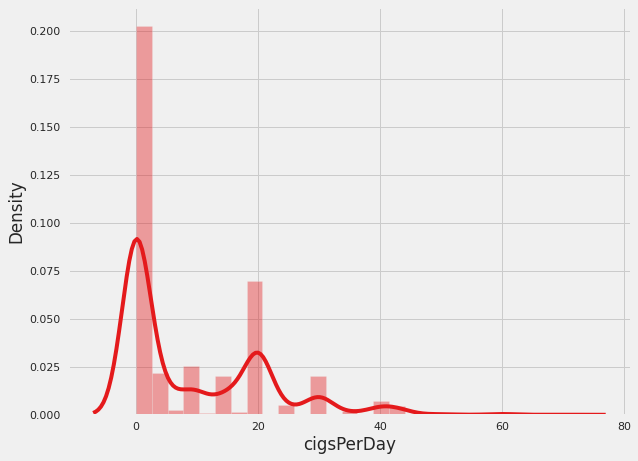

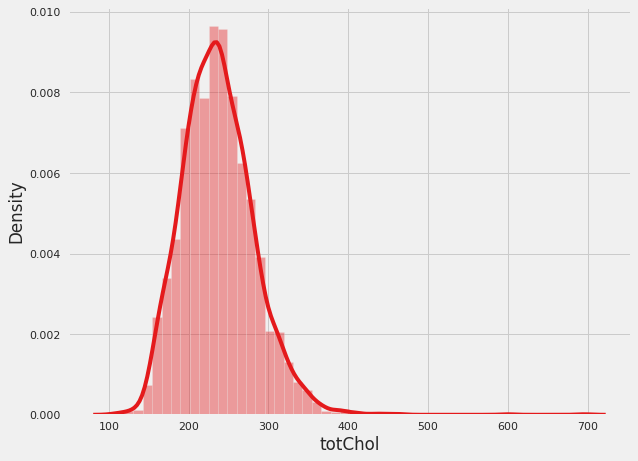

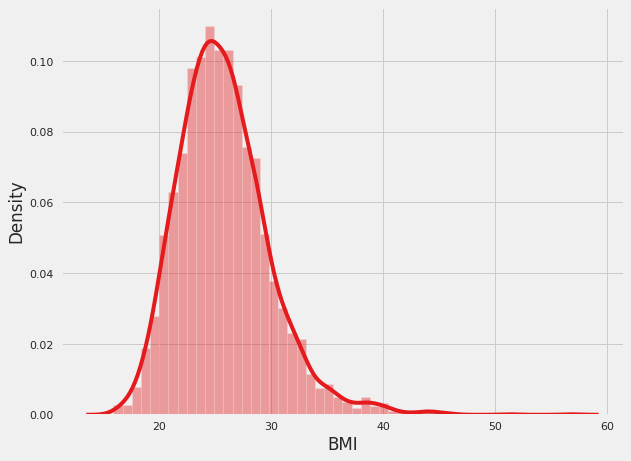

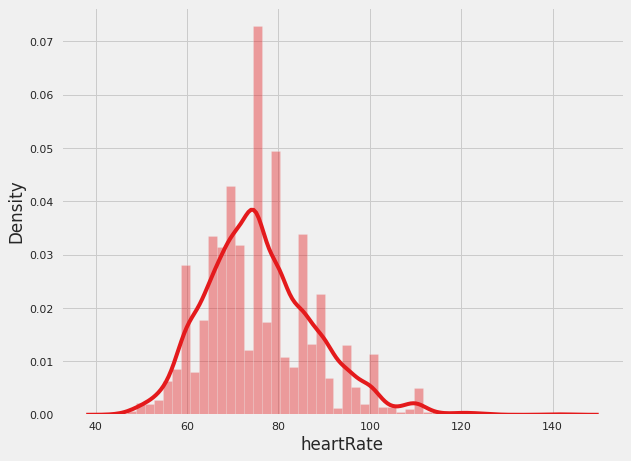

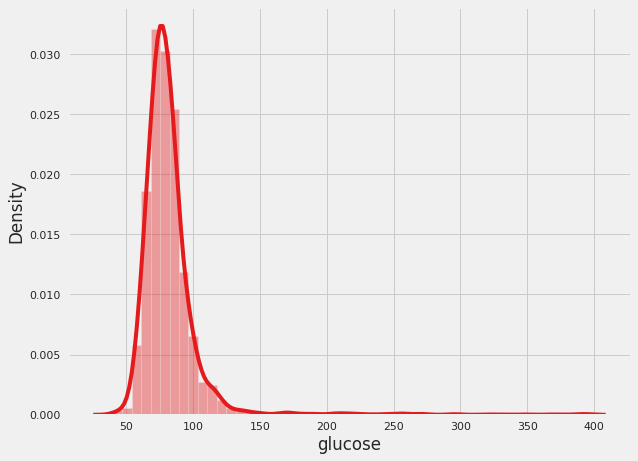

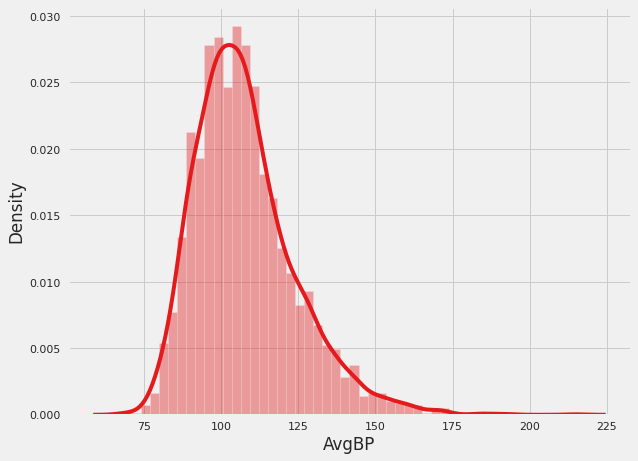

In [ ]:
# Visualization of all numeric continuous columns using distribution plot.

for col in ['age','cigsPerDay', 'totChol','BMI','heartRate','glucose','AvgBP']:
  plt.figure(figsize = (9,7))
  ax = plt.gca() # to get current axis.
  sns.distplot(df[col], ax =ax) # distribution using distplot of seaborn module.
  plt.show() # to show all graphs.

In [ ]:
# Showing the head of X dataframe.

X.head()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,sex_M,AvgBP
0,64.00,2.00,3.00,0.00,0.00,0.00,0.00,221.00,26.91,90.00,80.00,0.00,116.50
1,36.00,4.00,0.00,0.00,0.00,1.00,0.00,212.00,29.77,72.00,75.00,1.00,133.00
2,46.00,1.00,10.00,0.00,0.00,0.00,0.00,250.00,20.35,88.00,94.00,0.00,93.50
3,50.00,1.00,20.00,0.00,0.00,1.00,0.00,233.00,28.26,68.00,94.00,1.00,123.00
4,64.00,1.00,30.00,0.00,0.00,0.00,0.00,241.00,26.42,70.00,77.00,0.00,110.75


In [ ]:
# showing the target variable.

y

0       1
1       0
2       0
3       1
4       0
       ..
3385    0
3386    0
3387    1
3388    0
3389    0
Name: TenYearCHD, Length: 3390, dtype: int64

In [ ]:
y.value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

* *As we can see that our dataset has heavy imbalance in target column. We need to handle this using SMOTE.*

# **<u>Synthetic Minority Oversampling Technique (SMOTE)**</u>

This technique generates synthetic data for the minority class.

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

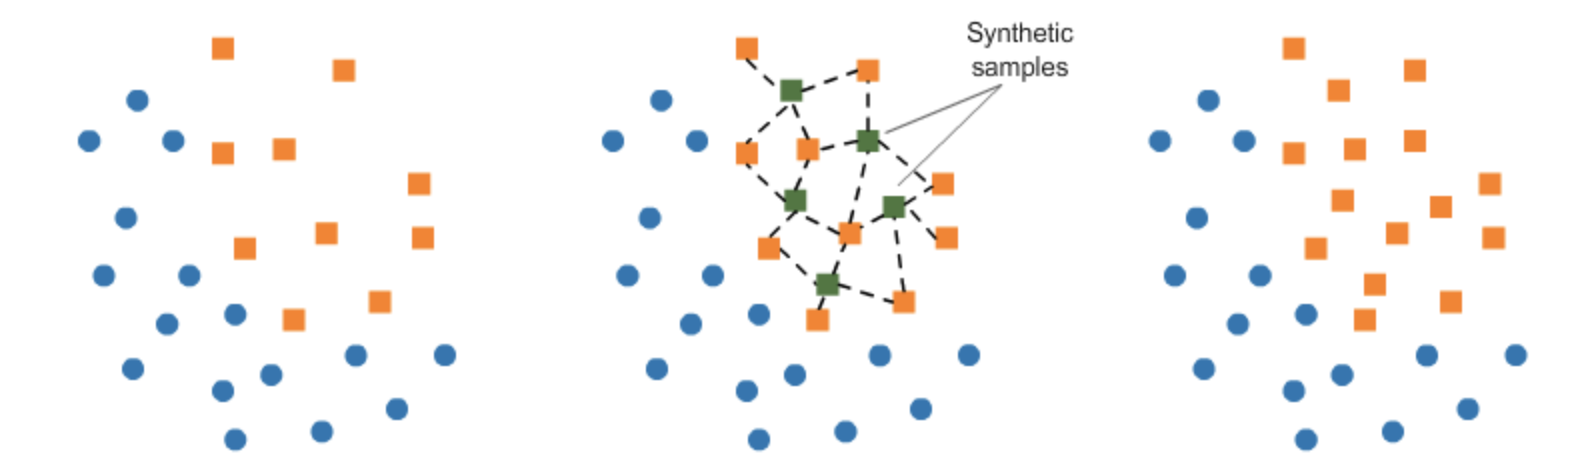

SMOTE algorithm works in 4 simple steps:

* Choose a minority class as the input vector
* Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
* Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor
* Repeat the steps until data is balanced

In [ ]:
smote = SMOTE(sampling_strategy='minority') # Creating an object of SMOTE where sampling_strategy='minority'
X_sm, y_sm = smote.fit_resample(X, y) # fitting smote on the data.

In [ ]:
# counting the categories values.

y_sm.value_counts()

1    2879
0    2879
Name: TenYearCHD, dtype: int64

* *As we can see that after applying SMOTE, now the target column is balanced.*

In [ ]:
# splitting data into X_train, X_test, y_train, and y_test dataset after handling the imbalanced class problem.

X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, test_size = 0.20, random_state = 0)

In [ ]:
# CHecking the shape of X_train, X_test, y_train, and y_test dataset.

print("Shape of X_train : ",X_train.shape)
print("Shape of X_test : ",X_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test : ",y_test.shape)

Shape of X_train :  (4606, 13)
Shape of X_test :  (1152, 13)
Shape of y_train :  (4606,)
Shape of y_test :  (1152,)


In [ ]:
# Applying Standard scaler for Standardization and Robust Scaler for handling Outliers

standscler = ['age','cigsPerDay'] # StandardScaler
robust_sclr = ['totChol',  # Robust Scaler
 'BMI',
 'heartRate',
 'glucose',
 'AvgBP'
 ]

In [ ]:
# Applying ColumnTransformer.

transformer = ColumnTransformer(transformers=[
    ('tnf1',RobustScaler(),robust_sclr),
    ('tnf2',StandardScaler(), standscler),
],remainder='passthrough')

In [ ]:
# applying transformer on X_train and assigning to X_train_Scaled variable.

X_train_Scaled = transformer.fit_transform(X_train)

In [ ]:
# applying transformer on X_test and assigning to X_test_Scaled variable.

X_test_Scaled = transformer.fit_transform(X_test)

In [ ]:
# Showing X_train_Scaled.

print("X_train_Scaled : \n",X_train_Scaled)

X_train_Scaled : 
 [[-0.35087719 -0.46214902 -0.68124244 ...  0.          0.
   0.        ]
 [ 0.45614035 -0.31732807  0.         ...  0.          0.
   1.        ]
 [-1.0877193  -0.35056513  1.70310609 ...  0.          0.
   0.        ]
 ...
 [-0.52631579  0.47312689  0.         ...  1.          0.
   1.        ]
 [-1.50877193 -0.48852339  0.         ...  0.          0.
   1.        ]
 [-0.77192982  0.66180511 -0.20437273 ...  0.          0.
   1.        ]]


In [ ]:
# Showing X_test_Scaled

print("X_test : \n",X_test_Scaled)

X_test : 
 [[-0.20970131 -0.48263329 -0.34288775 ...  0.          0.
   1.        ]
 [-0.56563351  1.02469008  0.         ...  1.          0.
   1.        ]
 [-0.04020978  0.65600693 -0.20573265 ...  1.          0.
   1.        ]
 ...
 [ 0.34962072  0.05086886 -0.68577551 ...  0.          0.
   1.        ]
 [-0.58258267 -1.04075032 -0.48004286 ...  0.          0.
   0.        ]
 [-0.22665046 -0.33801172  0.         ...  0.          0.
   0.        ]]


In [ ]:
# Making a dataframe of X_train_Scaled using DataFrame method of pandas module.

X_train_df = pd.DataFrame(X_train_Scaled, columns = X_train.columns)

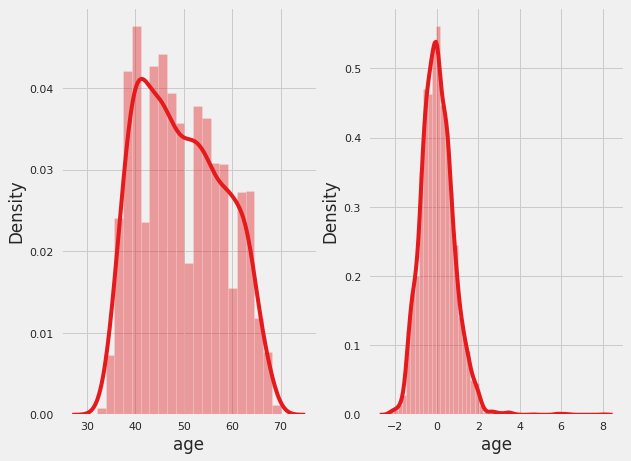

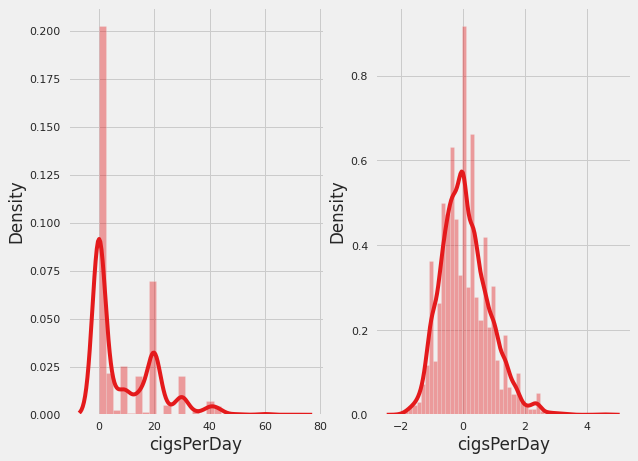

In [ ]:
# Visualization of categorical feature after applying Standard-Scaler

for col in standscler:
  plt.figure(figsize = (9,7))
  plt.subplot(1,2,1)
  sns.distplot(df[col])
  plt.subplot(1,2,2)
  sns.distplot(X_train_df[col])
  plt.show()

# **<center><u>5.Model Implementation</u></center>**

# <b> <u>Logistic Regression: </u></b>

### Logistic regression is a classification algorithm that predicts the probability of an outcome that can only have two values (i.e. a dichotomy). A logistic regression produces a logistic curve, which is limited to values between 0 and 1. Logistic regression models the probability that each input belongs to a particular category.

### **Logistic regression** is an excellent tool to know for classification problems, which are problems where the output value that we wish to predict only takes on only a small number of discrete values. Here we'll focus on the binary classification problem, where the output can take on only two distinct classes.

### In **Logistic Regression**, the log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:

### \begin{align*}
    \log \left({p\over 1-p}\right) &= w_0 + w_1x_1, ..., w_jx_j \nonumber \\
    &= w^Tx \nonumber
\end{align*}

### where:

- ### $w_{0}$ is the intercept term, and $w_1$ to $w_j$ represents the parameters for all the other features (a total of j features).
- ### By convention of we can assume that $x_0 = 1$, so that we can re-write the whole thing using the matrix notation $w^Tx$.

### This is called the **logit function**. The equation can be re-arranged into the **logistic function**:

### $$p = \frac{e^{w^Tx}} {1 + e^{w^Tx}}$$

### Or in the more commonly seen form:

### $$h_w(x) = \frac{1}{ 1 + e^{-w^Tx} }$$ 

In [ ]:
log_reg = LogisticRegression() # Creating Object of LogisticRegression Class.
log_reg.fit(X_train_Scaled, y_train) # Training the model using fit method.

LogisticRegression()

In [ ]:
y_pred_log_reg = log_reg.predict(X_test_Scaled) #predicting the target of X_test using predict method of model object.

# <b><u> Evaluation metrics for classification models </u></b>

* #### <b><u>Accuracy</u></b> : Accuracy will require two inputs (i) actual class labels (ii)predicted class labels. To get the class labels from probabilities( these probabilities will be probabilities of getting a HIT), you can take a threshold of 0.5. Any probability above 0.5 will be labeled as class 1 and anything less than 0.5 will be labeled as class 0.


* #### <b><u>Precision</u></b> :  Precision for a label is defined as the number of true positives divided by the number of predicted positives. Report precision in percentages.

* #### <b><u>Recall</u></b> : Recall for a label is defined as the number of true positives divided by the total number of actual positives. Report recall in percentages.

* #### <b><u>F1-Score</u></b> : This is defined as the harmonic mean of precision and recall. 

* #### <b><u>Log Loss</u></b> : This is defined as \begin{align*}
  Log Loss &= \sum_{i=1}^{M} [ y^{i}log(P^{i}) + (1- y^{i})log(1 - P^{i} )]\\
\end{align*}

 Here M refers to the number of observations and $y^{i}$ = 1 or 0 depending upon the label for the $i^{th}$ observation and $P^{i}$ is the probability of class 1 or probability of getting a HIT.

* #### <b><u>AUC-ROC</u></b> - The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.


[[377 176]
 [199 400]]

-----------------------------------------



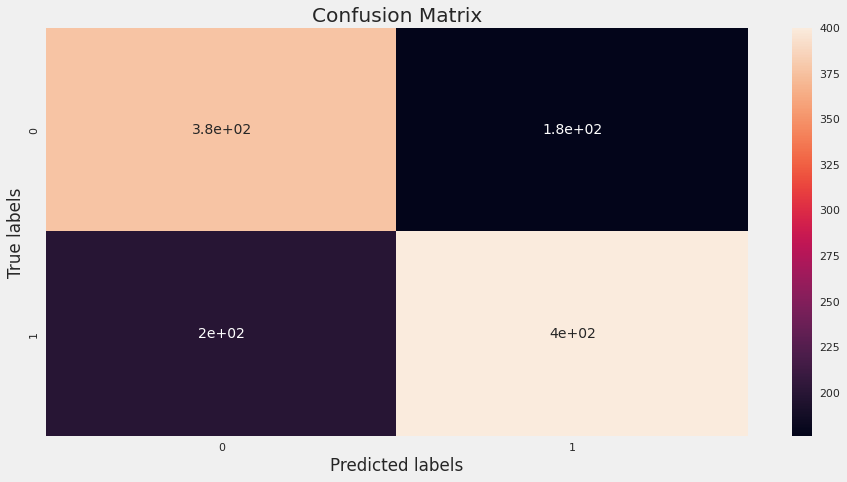

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test, y_pred_log_reg)
print(cm)
print("\n-----------------------------------------\n")

# ax= plt.subplot()
f = plt.figure(figsize =(14,7))
ax = f.gca()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix');

In [ ]:
## Classification report of Logistic Regression

print(classification_report(y_test, y_pred_log_reg)) 

              precision    recall  f1-score   support

           0       0.65      0.68      0.67       553
           1       0.69      0.67      0.68       599

    accuracy                           0.67      1152
   macro avg       0.67      0.67      0.67      1152
weighted avg       0.68      0.67      0.67      1152



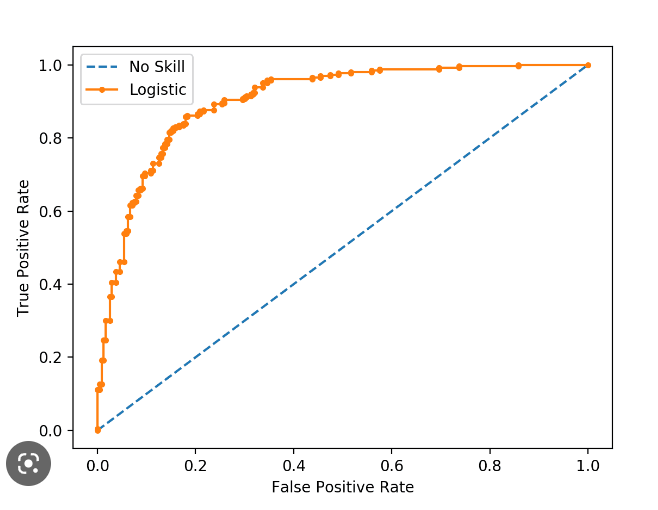

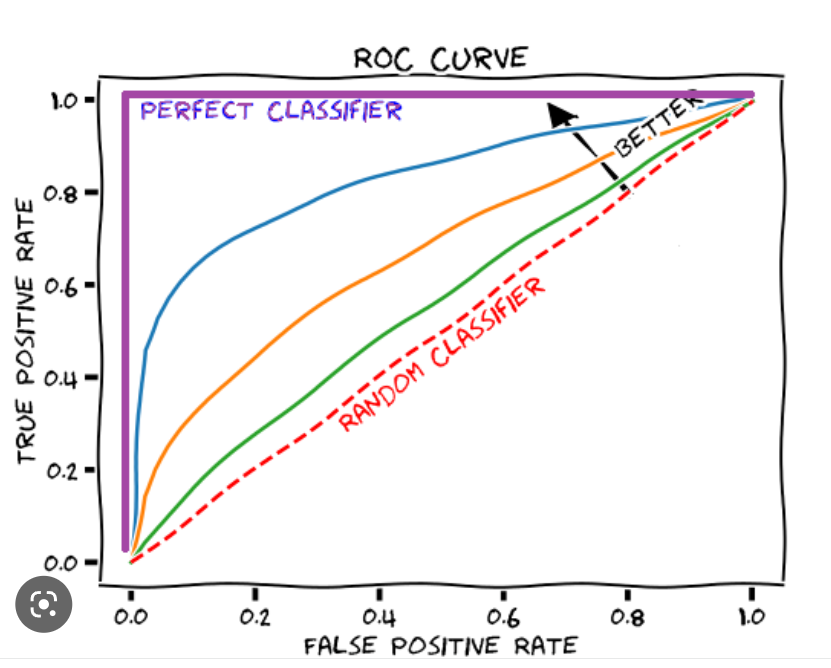

In [ ]:
# Importing roc_curve and roc_auc_score from metrics module of sklearn.

from sklearn.metrics  import roc_curve
from sklearn.metrics  import roc_auc_score
# Importing GridSearchCV from model_selection of sklearn library.

from sklearn.model_selection import GridSearchCV
# Importing KNeighborsClassifier from neighbours of sklearn module.

from sklearn.neighbors import KNeighborsClassifier
import shap


def plot_roc_curve(true_y, y_prob): # function for ploting the roc_curve
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

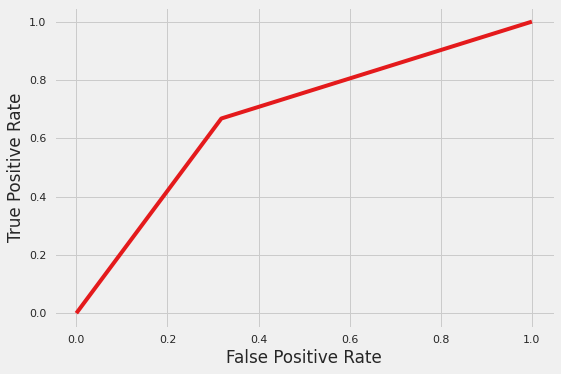

In [ ]:
plot_roc_curve(y_test, y_pred_log_reg) # calling plot_roc_curve function

In [ ]:
# Finding the roc_auc_score

print("Roc_Auc_Score : ",roc_auc_score(y_test, y_pred_log_reg))

Roc_Auc_Score :  0.6747578091273281


### <u>Hyperparameter Tunning</u>

# <b> The Cross-Validation Procedure </b>

### In cross-validation, we run our modeling process on different subsets of the data to get multiple measures of model quality. For example, we could have 5 folds or experiments. We divide the data into 5 pieces, each being 20% of the full dataset.

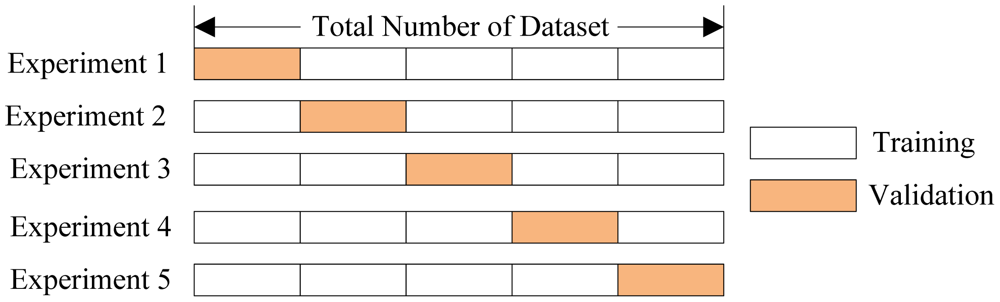

### We run an experiment called experiment 1 which uses the first fold as a holdout set, and everything else as training data. This gives us a measure of model quality based on a 20% holdout set, much as we got from using the simple train-test split. 

### We then run a second experiment, where we hold out data from the second fold (using everything except the 2nd fold for training the model.) This gives us a second estimate of model quality. We repeat this process, using every fold once as the holdout. Putting this together, 100% of the data is used as a holdout at some point.

### Returning to our example above from train-test split, if we have 5000 rows of data, we end up with a measure of model quality based on 5000 rows of holdout (even if we don't use all 5000 rows simultaneously.


In [ ]:
# Doing Hyperparameter tunning using GridSearchCV.
parameters = {
    "penalty" : ['l1', 'l2', 'elasticnet'],
    "C": [0.1,0.2,0.5,1.0,1.5,2,2.5,3,3.5,4,6,7,8,9,10]
}
log = LogisticRegression()

log_grid = GridSearchCV(log, param_grid = parameters, scoring = "accuracy", cv = 5,verbose = 1)

In [ ]:
log_grid.fit(X_train_Scaled, y_train) # Training of logistic Regression after cross-validation.

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.2, 0.5, 1.0, 1.5, 2, 2.5, 3, 3.5, 4, 6, 7,
                               8, 9, 10],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy', verbose=1)

In [ ]:
log_grid.best_params_

{'C': 2, 'penalty': 'l2'}

* <i>C : float, default=1.0
    Inverse of regularization strength; must be a positive float.
Like in support vector machines, smaller values specify stronger
regularization.</i>
* *penalty: l2 - Ridge Regularization, l1 - Lasso Regularization.*

In [ ]:
y_pred_log_grid = log_grid.predict(X_test_Scaled) # We are doing predicting of X_test_Scaled data.

[[376 177]
 [199 400]]

-----------------------------------------



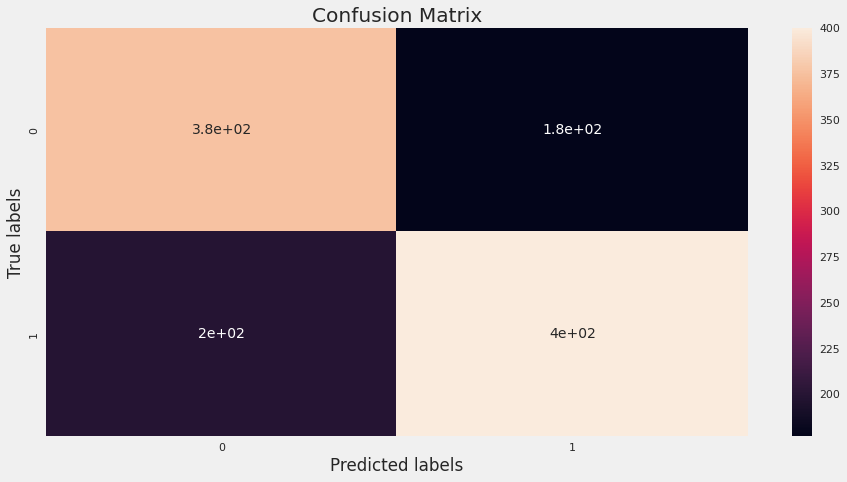

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test, y_pred_log_grid)
print(cm)
print("\n-----------------------------------------\n")

# ax= plt.subplot()
f = plt.figure(figsize =(14,7))
ax = f.gca()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix');

In [ ]:
print(classification_report(y_test, y_pred_log_grid))

              precision    recall  f1-score   support

           0       0.65      0.68      0.67       553
           1       0.69      0.67      0.68       599

    accuracy                           0.67      1152
   macro avg       0.67      0.67      0.67      1152
weighted avg       0.67      0.67      0.67      1152



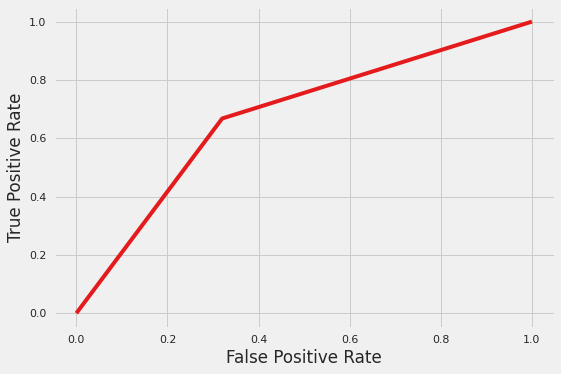

In [ ]:
plot_roc_curve(y_test, y_pred_log_grid) # calling plot_roc_curve function

In [ ]:
# Finding the roc_auc_score

print("Roc_Auc_Score : ",roc_auc_score(y_test, y_pred_log_grid))

Roc_Auc_Score :  0.6738536499953207


# **<u>K-Nearest-Neighbour Classifier</u>**

In [ ]:
# Creating the object of KNN classifier

knn_classfier = KNeighborsClassifier()
knn_classfier.fit(X_train_Scaled, y_train) # Training the KNN classifier model.

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn_classfier.predict(X_test_Scaled) # Predicting the target value of X_test_Scaled data.

In [ ]:
print(classification_report(y_test, y_pred_knn)) # Classification report of KNN classifier

              precision    recall  f1-score   support

           0       0.93      0.67      0.78       553
           1       0.76      0.95      0.84       599

    accuracy                           0.82      1152
   macro avg       0.84      0.81      0.81      1152
weighted avg       0.84      0.82      0.81      1152



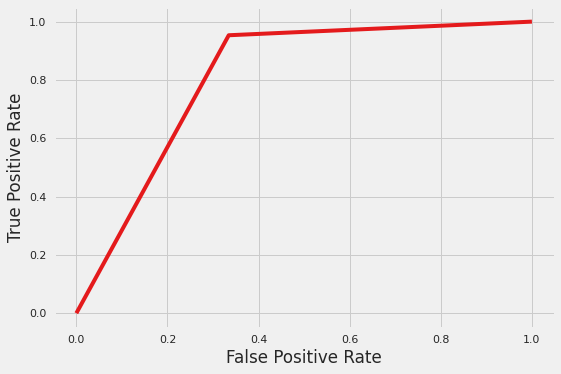

In [ ]:
plot_roc_curve(y_test, y_pred_knn) # plotting the roc_curve

In [ ]:
# displaying the roc_auc_score.

print("ROC AUC Score : ",roc_auc_score(y_test, y_pred_knn))

ROC AUC Score :  0.8093582734334197


In [ ]:
# Cross validation of KNN classifier.

# Doing Hyperparameter tunning using GridSearchCV.
parameters = {
    "n_neighbors" : [3, 5, 7, 9, 11, 13, 15],
    "weights":  ['uniform', 'distance'],
    "algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute']
}
knn = KNeighborsClassifier()

knn_classifier_grid = GridSearchCV(knn, param_grid = parameters, scoring = "accuracy", cv = 5,verbose = 1)

In [ ]:
knn_classifier_grid.fit(X_train_Scaled, y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [ ]:
knn_classifier_grid.best_params_

{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}

In [ ]:
y_pred_knn_grid = knn_classifier_grid.predict(X_test_Scaled)

In [ ]:
print(classification_report(y_test, y_pred_knn_grid))

              precision    recall  f1-score   support

           0       0.96      0.69      0.80       553
           1       0.77      0.97      0.86       599

    accuracy                           0.84      1152
   macro avg       0.87      0.83      0.83      1152
weighted avg       0.86      0.84      0.83      1152



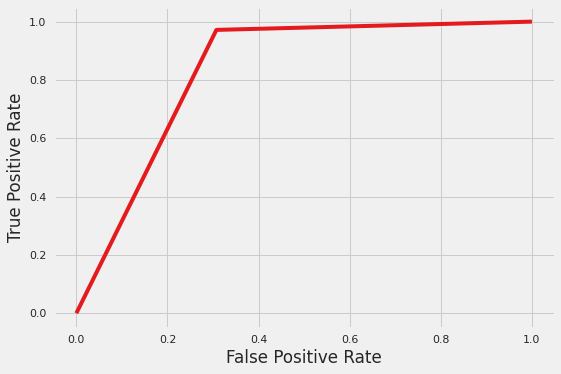

In [ ]:
plot_roc_curve(y_test, y_pred_knn_grid) # plotting the roc_curve

In [ ]:
# displaying the roc_auc_score.

print("ROC AUC Score : ",roc_auc_score(y_test, y_pred_knn_grid))

ROC AUC Score :  0.8321026303634449


In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 6.8 MB/s 


SHAP procedure can be applied e.g. using a dedicated Python shap library. As an analyst, we can choose from three different explainers – functions within the shap library.

* TreeExplainer - for the analysis of decision trees
* DeepExplainer - for the deep learning algorithms
* KernelExplainer - for most other algorithms

# **<u>Support Vector Machine</u>**

In [ ]:
svc = SVC() # Creating object of Support vector classifier 

In [ ]:
# Training the SVC model.

svc.fit(X_train_Scaled, y_train)

SVC()

In [ ]:
y_pred_svc = svc.predict(X_test_Scaled) # Predicting the output of X_test_Scaled and assigning it to y_pred_svc

In [ ]:
# displaying the classification report 

print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70       553
           1       0.72      0.74      0.73       599

    accuracy                           0.72      1152
   macro avg       0.72      0.72      0.72      1152
weighted avg       0.72      0.72      0.72      1152



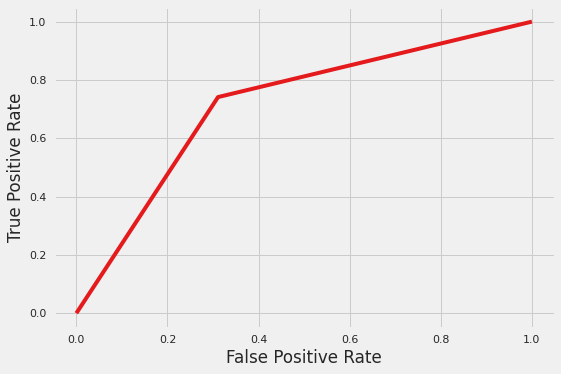

In [ ]:
# plotting the roc_auc_curve

plot_roc_curve(y_test, y_pred_svc)

In [ ]:
# displaying the roc_auc_score 

print("ROC and AUC Score : ",roc_auc_score(y_test, y_pred_svc))

ROC and AUC Score :  0.7151023254550231


In [ ]:
# Cross validation of SVC.

# Doing Hyperparameter tunning using GridSearchCV.

parameters = {
    "C" : [0.2,0.5,8,1.0,1.2,1.5,2.0,2.5,3.0],
    "kernel" : ['linear', 'poly', 'rbf', 'sigmoid'],       # default rbf radial bases function   
    "shrinking" : [True, False]
}
svc = SVC()

svc_grid = GridSearchCV(svc, param_grid = parameters, scoring = "accuracy", cv = 5,verbose = 1)

In [ ]:
# Training the support vector classifier.

svc_grid.fit(X_train_Scaled, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.2, 0.5, 8, 1.0, 1.2, 1.5, 2.0, 2.5, 3.0],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'shrinking': [True, False]},
             scoring='accuracy', verbose=1)

In [ ]:
svc_grid.best_params_

{'C': 8, 'kernel': 'rbf', 'shrinking': True}

In [ ]:
y_pred_svc_grid = svc_grid.predict(X_test_Scaled) # Predicting the output of X_test_Scaled

In [ ]:
# displaying the classification report of SVC after doing cross validation.

print(classification_report(y_test, y_pred_svc_grid))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       553
           1       0.78      0.78      0.78       599

    accuracy                           0.78      1152
   macro avg       0.78      0.78      0.78      1152
weighted avg       0.78      0.78      0.78      1152



ROC and AUC Score :  0.7756840061947731


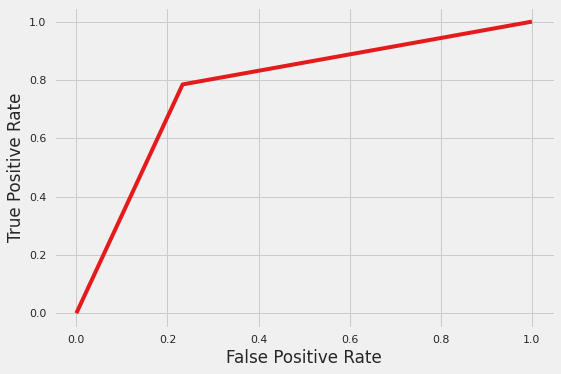

In [ ]:
# plotting the roc_auc_curve

plot_roc_curve(y_test, y_pred_svc_grid)
# displaying the roc_auc_score 

print("ROC and AUC Score : ",roc_auc_score(y_test, y_pred_svc_grid))

# **<u>Naive Bayes Classifier Algorithm</u>**

# <b> <u>Introduction: What is Naive Bayes Classifier? </u></b>

### Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets. Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and-dirty baseline for a classification problem.


### Naive Bayes classifiers are built on Bayesian classification methods. These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities. In Bayesian classification, we're interested in finding the probability of a label given some observed features, which we can write as P(L | features). Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

### $P(L ~|~ \rm features)=\frac{P(\rm features ~|~ L) P(L)}{P(\rm features)}$

### If we are trying to decide between two labels—let's call them $L_1$ and $L_2$—then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

# $\frac{P(L_1 ~|~ \rm features)}{P(L_2 ~|~ \rm features) }= \frac{P(\rm features ~|~ L_1)}{P(\rm features ~|~ L_2)}\frac{P(L_1)}{P(L_2)}$

### All we need now is some model by which we can compute $P(\rm features~|~ L)$ for each label. Such a model is called a generative model because it specifies the hypothetical random process that generates the data. Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier. The general version of such a training step is a very difficult task, but we can make it simpler through the use of some simplifying assumptions about the form of this model.

### The posterior probability can be written as : 

# $P(Y ~|~X) = P(y)P(x_1|y)P(x_2|y,x_1)....P(x_n|y,x_1,...,x_{n-1})$

### Assuming all the X are conditionally independent
# $P(Y=1|X) = \frac{P(y=1)P(x_1|y=1)....P(x_n|y=1)}{P(X)}$

### This is where the "naive" in "naive Bayes" comes in: if we make very naive assumptions about the generative model for each label, we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification. Different types of naive Bayes classifiers rest on different naive assumptions about the data, and we will examine a few of these in the following sections.


In [ ]:
#Creating the object of Naive Bayes Classifier

gnb = GaussianNB()
gnb.fit(X_train_Scaled, y_train) # Training the Naive Bayes Classifier

GaussianNB()

In [ ]:
# making predictions on the testing set

y_pred_naive_byes = gnb.predict(X_test_Scaled) # Predicting the output of X_test_Scaled data.

In [ ]:
# displaying the classification report of Naive Bayes Classifier,

print(classification_report(y_test, y_pred_naive_byes))

              precision    recall  f1-score   support

           0       0.54      0.91      0.68       553
           1       0.78      0.30      0.43       599

    accuracy                           0.59      1152
   macro avg       0.66      0.60      0.56      1152
weighted avg       0.67      0.59      0.55      1152



ROC and AUC Score :  0.6042077362210073


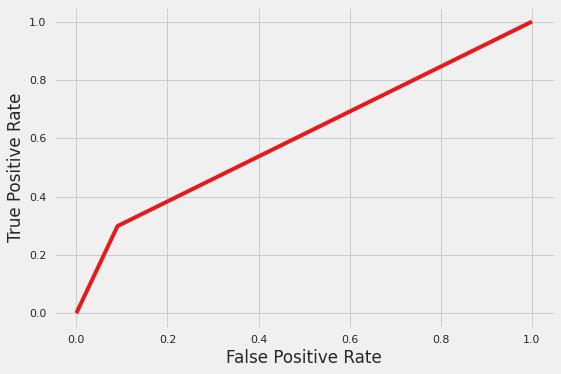

In [ ]:
# plotting the roc_auc_curve

plot_roc_curve(y_test, y_pred_naive_byes)
# displaying the roc_auc_score 

print("ROC and AUC Score : ",roc_auc_score(y_test, y_pred_naive_byes))

# **<u>Decision Tree Classifier</u>**

In [ ]:
# Creating the object of DecisionTreeClassifier and assigning it to dtree_classifier variable.

dtree_classifier = DecisionTreeClassifier()
dtree_classifier.fit(X_train_Scaled, y_train) # Training the Decision tree model

DecisionTreeClassifier()

In [ ]:
# Predicting the output of X_test_Scaled data.

y_pred_dtree = dtree_classifier.predict(X_test_Scaled)

In [ ]:
# Showing the classification report of Decision Tree Classification

print(classification_report(y_test, y_pred_dtree))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       553
           1       0.82      0.86      0.84       599

    accuracy                           0.83      1152
   macro avg       0.83      0.83      0.83      1152
weighted avg       0.83      0.83      0.83      1152



ROC and AUC Score :  0.8286867503705695


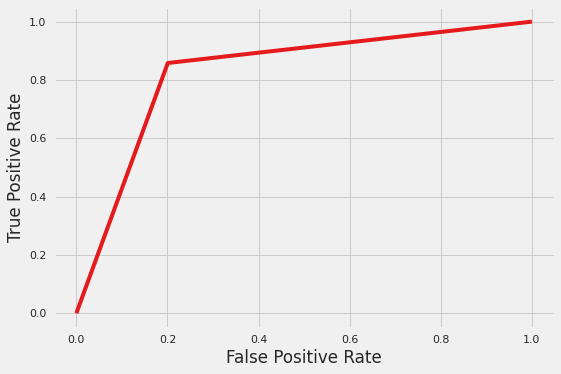

In [ ]:
# plotting the roc_auc_curve

plot_roc_curve(y_test, y_pred_dtree)
# displaying the roc_auc_score 

print("ROC and AUC Score : ",roc_auc_score(y_test, y_pred_dtree))

In [ ]:
# Doing Hyperparameter tunning using GridSearchCV of Decision Tree Classifier.

parameters = {
    "criterion" : ['gini', 'entropy', 'log_loss'],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'splitter' : ['best', 'random']    # default rbf radial bases function   
}

dtree_grid = DecisionTreeClassifier()

dtree_grid= GridSearchCV(dtree_grid, param_grid = parameters, scoring = "accuracy", cv = 5,verbose = 1)

In [ ]:
dtree_grid.fit(X_train_Scaled, y_train) # Training the Decision Tree Classifier after hyperparameter tuning.

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [ ]:
dtree_grid.best_params_ # Finding the best parameters after hyperparameter tuning.

{'criterion': 'entropy', 'max_features': 'sqrt', 'splitter': 'best'}

In [ ]:
y_pred_dtree_grid = dtree_grid.predict(X_test_Scaled) # Predicting the value of X_test_Scaled data and assigning it to y_pred_dtree_grid.

In [ ]:
# Displaying the classification report of DecisionTreeClassifier after hyperparameter tuning.

print(classification_report(y_test, y_pred_dtree_grid))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       553
           1       0.81      0.80      0.80       599

    accuracy                           0.80      1152
   macro avg       0.80      0.80      0.80      1152
weighted avg       0.80      0.80      0.80      1152



ROC_AUC Score :  0.7968283486341008


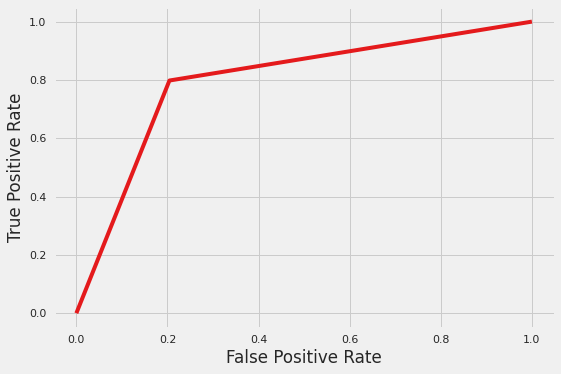

In [ ]:
# plotting the graph of roc.

plot_roc_curve(y_test, y_pred_dtree_grid)

# finding the roc_auc score 
print("ROC_AUC Score : ",roc_auc_score(y_test, y_pred_dtree_grid))

# **<u>Random Forest Classifier</u>**

In [ ]:
random_forest_clss = RandomForestClassifier() # Creating object of RandomForestClassifier Algo.
random_forest_clss.fit(X_train_Scaled, y_train) # Training the model.

RandomForestClassifier()

In [ ]:
y_pred_random_frst = random_forest_clss.predict(X_test_Scaled) # Prediction of X_test_Scaled data using random forest model

In [ ]:
# SHowing the classification report of randomforestclassifier.

print(classification_report(y_test, y_pred_random_frst))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       553
           1       0.92      0.86      0.89       599

    accuracy                           0.89      1152
   macro avg       0.89      0.89      0.89      1152
weighted avg       0.89      0.89      0.89      1152



ROC_AUC Score :  0.8926737449697658


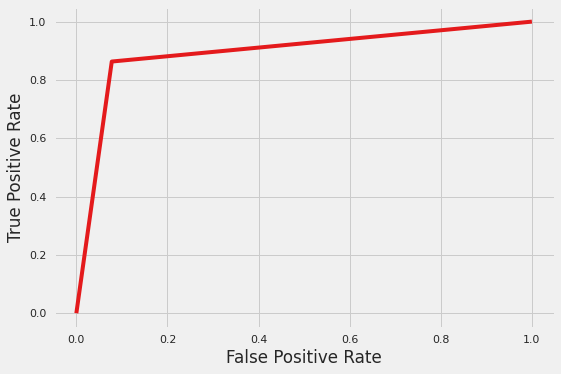

In [ ]:
# ploting cure of roc.
plot_roc_curve(y_test, y_pred_random_frst )

# checking the roc_auc score
print("ROC_AUC Score : ",roc_auc_score(y_test,y_pred_random_frst))


# **<u>XGBoost Classifier</u>**

In [ ]:
# Creating model of XGBoostClassifier and training.

xgbost_clss = XGBClassifier()
xgbost_clss.fit(X_train_Scaled, y_train)

XGBClassifier()

In [ ]:
y_pred_xgbost = xgbost_clss.predict(X_test_Scaled) # Predicting the output of X_test_Scaled data using xgboost classifier model.

In [ ]:
# Visualizing the classificaion report.

print(classification_report(y_test, y_pred_xgbost))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       553
           1       0.90      0.79      0.84       599

    accuracy                           0.85      1152
   macro avg       0.85      0.85      0.85      1152
weighted avg       0.85      0.85      0.85      1152



ROC_AUC Score :  0.850312606604739


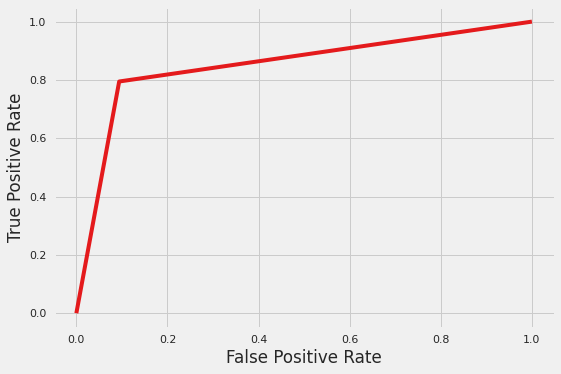

In [ ]:
#ploting the roc_curve 
plot_roc_curve(y_test, y_pred_xgbost)

#finding the roc_auc score
print("ROC_AUC Score : ",roc_auc_score(y_test,y_pred_xgbost))

In [ ]:
pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
clf = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric = None) #Creating object of LazyClassifier algo.

In [ ]:
### fitting data in LazyClassifier
models,predictions = clf.fit(X_train_Scaled, X_test_Scaled, y_train, y_test)
### lets check which model did better on Breast Cancer Dataset

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


 28%|██▊       | 8/29 [00:04<00:08,  2.43it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 90%|████████▉ | 26/29 [00:12<00:01,  2.30it/s]

StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 29/29 [00:12<00:00,  2.27it/s]


In [ ]:
# Displaying the Accuray Metrics of all the classifiers.

print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.92               0.92     0.92      0.92   
LabelSpreading                     0.89               0.89     0.89      0.89   
LabelPropagation                   0.89               0.89     0.89      0.89   
RandomForestClassifier             0.89               0.89     0.89      0.89   
BaggingClassifier                  0.85               0.85     0.85      0.85   
LGBMClassifier                     0.85               0.85     0.85      0.85   
XGBClassifier                      0.85               0.85     0.85      0.85   
AdaBoostClassifier                 0.84               0.84     0.84      0.84   
KNeighborsClassifier               0.83               0.83     0.83      0.83   
DecisionTreeClassifier             0.83               0.82     0.82      0.83   
NuSVC                       

# **<center><u>6.Model Explainability</u></center>**

* Explainability in machine learning means that you can explain what happens in your model from input to output. It makes models transparent and solves the black box problem. Explainability is the degree to which a human can understand the cause of a decision or the degree to which a human can consistently predict ML model results. Explainability and interpretability are often used interchangeably. Although they have the same goal to understand the model.




* A car needs fuel to move, i.e it is the fuel that causes the engines to move – Interpretability. Understanding how and why the engine consumes and uses the fuel – Explainability.

  However, when the model is explainable then we can go a step further – we  should be able not only to explain what happened but also why – which variables contributed the most to the result, which relations in data were crucial, and how only causal relationships were picked up. Only then we can call a model auditable and able to gain the trust of users.

* Take an example: you’re building a model that predicts pricing trends in the fashion industry. The model might be interpretable — you can see what you’re doing. But it’s not explainable yet. It will be explainable once you dig into the data and features behind the generated results. Understanding what features contribute to the model’s prediction and why they do is what explainability is all about.

# **<u>Why is Explainability important?</u>**

Machine Learning gets a bad reputation when it negatively impacts business profits. This often happens because of the disconnection between the data science team and the business team.

Explainability connects the data science team and non-technical team, improving knowledge exchange, and giving all stakeholders a better understanding of product requirements and limitations. All of this promotes better governance. 

But there are at least five more reasons why ML Explainability is important:

1. **Accountability:**

 When a model makes a wrong or rogue decision, knowing the factors that caused that decision, or who is responsible for that failure, is necessary to avoid similar problems in the future. With model explanation, data science teams can give organizations more control over their ML models.

2. **Trust:** 

 In high-risk domains (like healthcare or finance), trust is critical. Before ML solutions can be used and trusted, all stakeholders must fully understand what the model does. If you claim that your model makes better decisions and notices patterns that humans don’t see, you need to be able to back it up with evidence. Domain experts will be naturally skeptical towards any technology that claims to see more than them.

3. **Compliance:**

 Model explainability is critical for data scientists, auditors, and business decision-makers alike to ensure compliance with company policies, industry standards, and government regulations. 

4. **Performance:**

  Explainability can also improve performance. If you understand why and how your model works, you know exactly what to fine-tune and optimize. 

  

5. **Enhanced control:** 

 Understanding the decision-making process of your models shows you unknown vulnerabilities and flaws. With these insights, control is easy. The ability to rapidly identify and correct mistakes in low-risk situations adds up, especially when applied across all models in production.


# <u>**Model Explainability Using SHAP (SHapley Additive exPlanations)**</u>


SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions (see papers for details and citations).

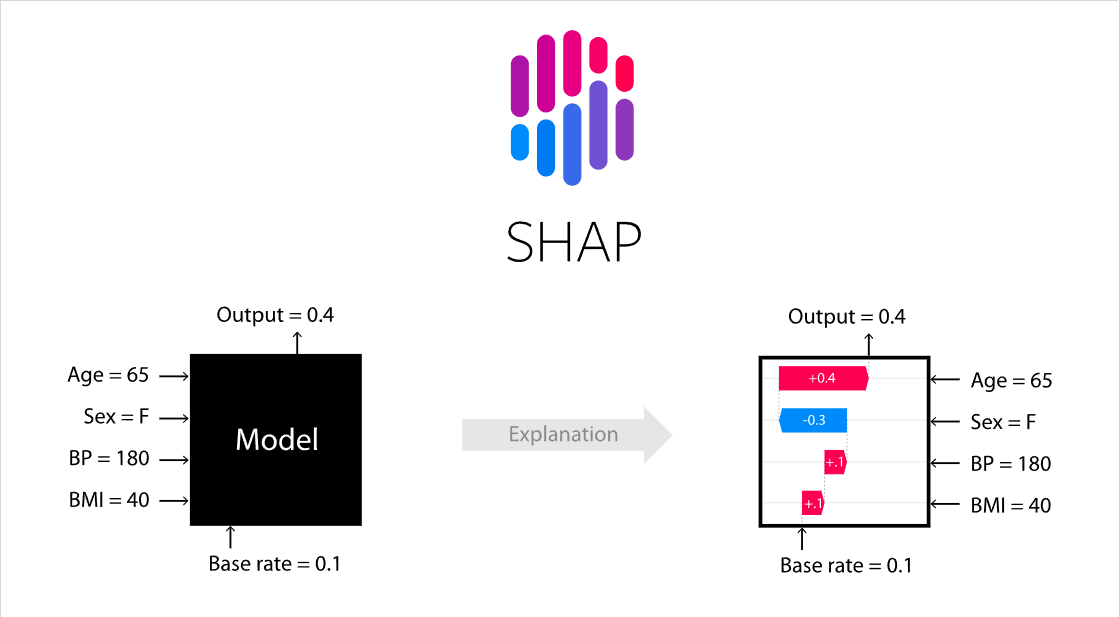

In [ ]:
pip install shap # Importing shape library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 7.7 MB/s 


In [ ]:
explainer = shap.Explainer(xgbost_clss)
shap_values = explainer(X)

In [ ]:
y_test.reset_index(drop =True )

464     0
98      0
1155    0
852     0
4170    1
Name: TenYearCHD, dtype: int64

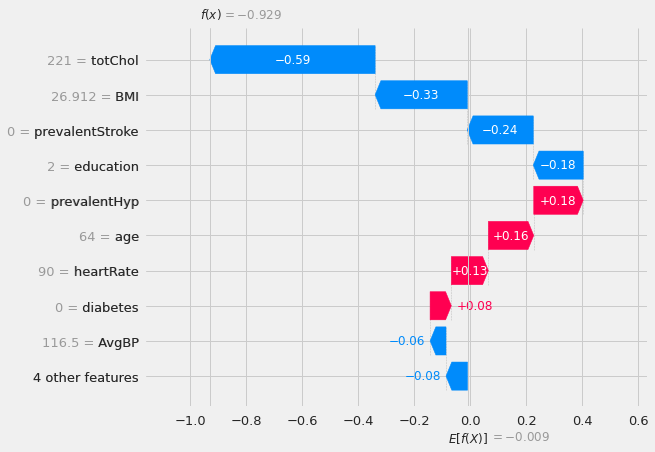

In [ ]:
# visualize the first record's prediction explanation

shap.plots.waterfall(shap_values[0])

The above explanation shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue. Another way to visualize the same explanation is to use a force plot (these are introduced in our Nature BME paper):

In [ ]:
# visualize the first prediction's explanation with a force plot
shap.initjs()
shap.plots.force(shap_values[0])

If we take many force plot explanations such as the one shown above, rotate them 90 degrees, and then stack them horizontally, we can see explanations for an entire dataset (in the notebook this plot is interactive):

To get an overview of which features are most important for a model we can plot the SHAP values of every feature for every sample. The plot below sorts features by the sum of SHAP value magnitudes over all samples, and uses SHAP values to show the distribution of the impacts each feature has on the model output. The color represents the feature value (red high, blue low). This reveals for example that a high LSTAT (% lower status of the population) lowers the predicted home price.

We can also just take the mean absolute value of the SHAP values for each feature to get a standard bar plot (produces stacked bars for multi-class outputs):

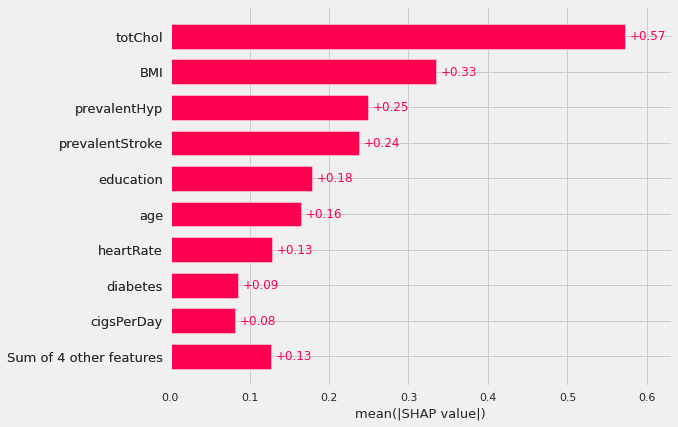

In [ ]:
# Showing the mean weightage/Importance of all features of dataset using barplot.

shap.plots.bar(shap_values)

# **<center><u>Summary</u></center>**

1. <i>First of all we dealt with the dataset by performing EDA. We imputed the missing values, Visualized and Analysed the relationships, Detected the Outliers. Then we moved on to feature engineering, Encoded the features, Constructed the features, Removed the multicollinearity using heatmap of seaborn library. </i>

2. <i>In pre-processing, we scaled the features using Standard Scaler and Robust Scaler(To handle Outliers). Then we split the data into training and testing sets with the ratio of 80:20 respectively.</i>


3. <i> Then we applied Logistic regression. And we got the classification report as you can see below:</i>
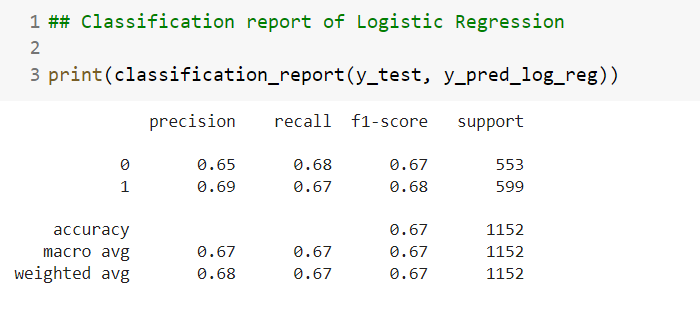

4. <i>Then we applied KNN-classifier. And we got classification report as shown below:</i>
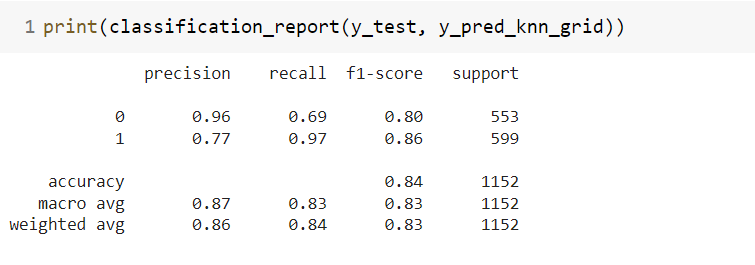


5. <i>After that we applied Support Vector Classifier. And we got the classification report as you can see below:</i>
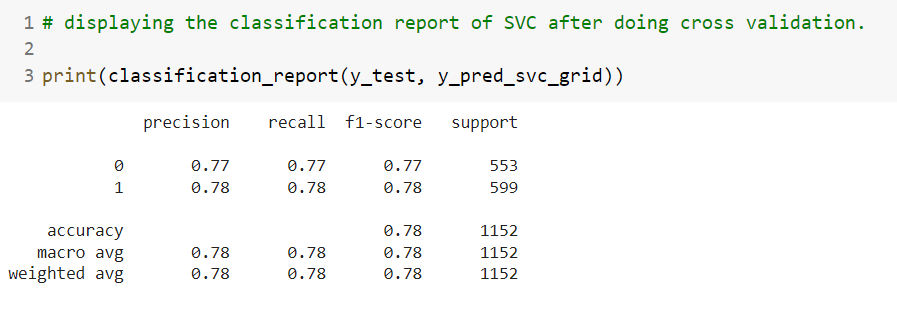

6. <i>Then we applied Naive Bayes Classifier. And we got the classification report, which you can see below:</i>
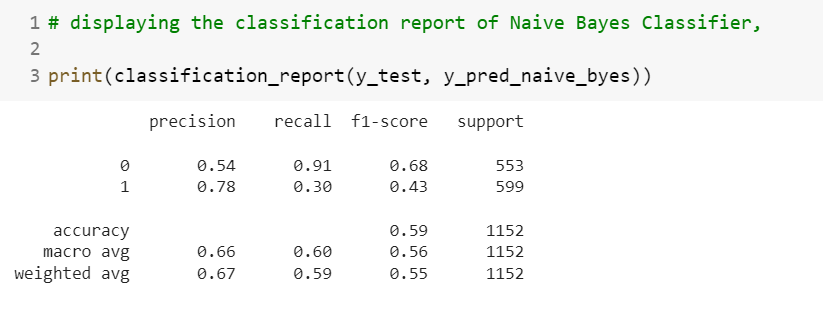

7. <i>And then we applied Decision-Tree-Classifier. And we got the classification report. Which you can see below:</i>
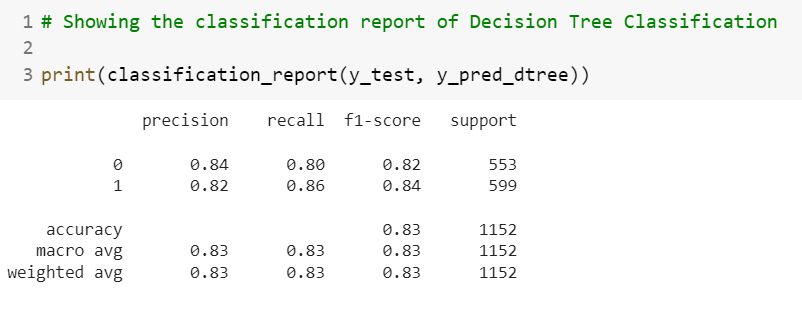

8. <i>After applying Decision tree classifier, we applied Random Forest. And we got the classification report, which you can see below: </i>
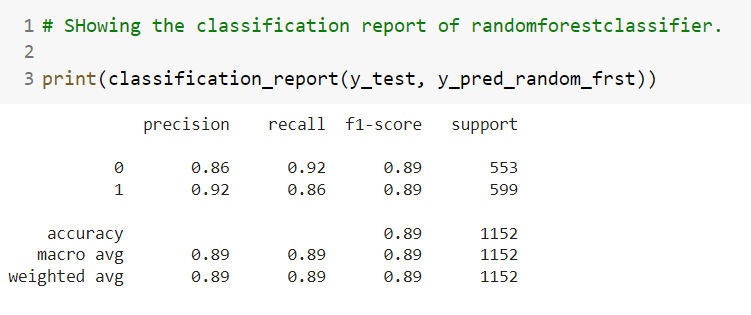


9. <i>Then we applied XGboost classifier:</i>

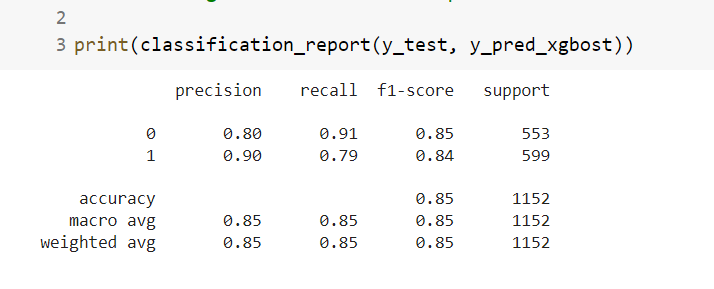

* <i>We can see that we have got the best result using the <u><b>Random Forest Classifier Algorithm</b></u> i.e.
<b> 
1. Accuracy : 89% 
2. Precision : 89%
3. Recall : 89%
4. f1-score : 89%
5. roc_auc_Score : 89% </b></i>